# Setup and Spotify data download

In [1]:
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import spotipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data

client_id = 'b966a51bce764f7cb31ae306a8d3980c'
client_secret = '9bd0de3086cb4fb39670e59a1e57be4e'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [2]:
mc_uri = 'spotify:artist:4iHNK0tOyZPYnBU7nGAgpQ'
results = sp.artist_albums(mc_uri, album_type='album')

In [3]:
#Albums and URIs (excluding the Christmas ones/#1s and compilations)
mariah_carey = 'spotify:album:5SwNGsGw1I8H361DKiYnnn'
emotions = 'spotify:album:0SHpIbyBLUugMXsl3yNkUz'
music_box = 'spotify:album:2NKxb7pk04CuZab5udkGUl'
daydream = 'spotify:album:1ibYM4abQtSVQFQWvDSo4J'
butterfly = 'spotify:album:7aDBFWp72Pz4NZEtVBANi9'
rainbow = 'spotify:album:1iSTXHBhLc9ImaqyvVZGft'
glitter = 'spotify:album:2hHFZLYnwsYOOxTCrlNvg0'
charmbracelet = 'spotify:album:2UYie72CXeuwIB7YepDidw'
mimi = 'spotify:album:0yv6r2Prvx8j0tibLJf9pj'
emc2 = 'spotify:album:7JXUd8N7OXYQz981E5Jaq2'
memoirs = 'spotify:album:0an7K6LfvYERpVviYMUFp0'
chanteuse = 'spotify:album:47voGlgRLcSe9VVO4K4IQa'
caution = 'spotify:album:64zK6tmksJw9gNZR0L4DVx'

In [4]:
##create a track searcher function
def getSpotifyTrack(search):
    result = sp.search(search)
    try:
        spotify = result['tracks']['items'][0]['uri']
        
    except:
        spotify = np.NaN
    return spotify


In [5]:
#get_song_details_from_albums
def get_track_details_from_albums(albums):
    for album in albums:
        result_df = pd.DataFrame(columns= [
                               'Album',
                               'Label',
                               'Release Date',
                               'Album Popularity',
                               'Track Number',
                               'Track Name',
                               'Track ID',
                               'Track Duration (mins)',
                               'Track Popularity',
                               'Danceability',
                               'Energy',
                               'Key',
                               'Loudness',
                               'Mode',
                               'Speechiness',
                               'Acousticness',
                               'Instrumentalness',
                               'Liveness',
                               'Valence',
                               'Tempo',
                               'Time Signature'
                               ])

        album_detail = sp.album(album)
        album_name = album_detail['name']
        label = album_detail['label']
        release_date = album_detail['release_date']
        album_popularity = album_detail['popularity']

        album_tracks = sp.album_tracks(album)
        no_tracks_in_album = len(album_tracks['items'])

        for track in range(0,no_tracks_in_album):
            track_number = album_tracks['items'][track]['track_number']
            track_name = album_tracks['items'][track]['name']
            track_id = album_tracks['items'][track]['uri']
            track_length = album_tracks['items'][track]['duration_ms']
            track_popularity = sp.track(track_id)['popularity']
            track_features = sp.audio_features(track_id)[0]
            danceability = track_features['danceability']
            energy = track_features['energy']
            key = track_features['key']
            loudness = track_features['loudness']
            mode = track_features['mode']
            speechiness = track_features['speechiness']
            acousticness = track_features['acousticness']
            instrumentalness = track_features['instrumentalness']
            liveness = track_features['liveness']
            valence = track_features['valence']
            tempo = track_features['tempo']
            time_signature = track_features['time_signature']

            result_df = result_df.append({
                               'Album': album_name,
                               'Label': label,
                               'Release Date': release_date,
                               'Album Popularity': album_popularity,
                               'Track Number': track_number,
                               'Track Name': track_name,
                               'Track ID': track_id,
                               'Track Duration (mins)': track_length/60000,
                               'Track Popularity': track_popularity,
                               'Danceability': danceability,
                               'Energy': energy,
                               'Key': key,
                               'Loudness': loudness,
                               'Mode': mode,
                               'Speechiness': speechiness,
                               'Acousticness' :acousticness,
                               'Instrumentalness':instrumentalness,
                               'Liveness': liveness,
                               'Valence': valence,
                               'Tempo': tempo,
                               'Time Signature':time_signature
            }, ignore_index = True)
            
    return result_df

In [6]:
#get_song_details_from_uri
def get_track_details(uris):
    
    result_df = pd.DataFrame(columns= [
                           'URI',
                           'Danceability',
                           'Energy',
                           'Key',
                           'Loudness',
                           'Mode',
                           'Speechiness',
                           'Acousticness',
                           'Instrumentalness',
                           'Liveness',
                           'Valence',
                           'Tempo',
                           'Time Signature'
                           ])
    
    for uri in uris:
        track_features = sp.audio_features(uri)[0]
        danceability = track_features['danceability']
        energy = track_features['energy']
        key = track_features['key']
        loudness = track_features['loudness']
        mode = track_features['mode']
        speechiness = track_features['speechiness']
        acousticness = track_features['acousticness']
        instrumentalness = track_features['instrumentalness']
        liveness = track_features['liveness']
        valence = track_features['valence']
        tempo = track_features['tempo']
        time_signature = track_features['time_signature']

        result_df = result_df.append({
                           'URI': uri,
                           'Danceability': danceability,
                           'Energy': energy,
                           'Key': key,
                           'Loudness': loudness,
                           'Mode': mode,
                           'Speechiness': speechiness,
                           'Acousticness' :acousticness,
                           'Instrumentalness':instrumentalness,
                           'Liveness': liveness,
                           'Valence': valence,
                           'Tempo': tempo,
                           'Time Signature':time_signature
        }, ignore_index = True)


    return result_df

In [7]:
mariah_carey_details = get_track_details_from_albums([mariah_carey])

In [8]:
emotions_details = get_track_details_from_albums([emotions])

In [9]:
music_box_details = get_track_details_from_albums([music_box])

In [10]:
daydream_details = get_track_details_from_albums([daydream])

In [11]:
butterfly_details = get_track_details_from_albums([butterfly])

In [12]:
rainbow_details = get_track_details_from_albums([rainbow])

In [13]:
glitter_details = get_track_details_from_albums([glitter])

In [14]:
charmbracelet_details = get_track_details_from_albums([charmbracelet])

In [15]:
mimi_details = get_track_details_from_albums([mimi])

In [16]:
emc2_details = get_track_details_from_albums([emc2])

In [17]:
memoirs_details = get_track_details_from_albums([memoirs])

In [353]:
chanteuse_details = get_track_details_from_albums([chanteuse])

In [354]:
chanteuse_details = chanteuse_details[0:17]

In [19]:
caution_details = get_track_details_from_albums([caution])

In [356]:
combined =pd.concat([mariah_carey_details, 
           emotions_details,
          music_box_details,
          daydream_details,
          butterfly_details,
          rainbow_details,
          glitter_details,
          charmbracelet_details,
          mimi_details,
          emc2_details,
          memoirs_details,
          chanteuse_details,
          caution_details])

In [21]:
no_1 = {
    "Vision of Love": 1,
    "Love Takes Time": 1,
    "Someday": 1,
    "I Don't Wanna Cry":1,
    "Emotions": 1,
    "Always Be My Baby":1,
    "Fantasy":1,
    "Dreamlover":1,
    "Heartbreaker (feat. Jay-Z)":1,
    "One Sweet Day":1,
    "My All":1,
    "Honey":1,
    "Hero":1,
    "Don't Forget About Us":1,
    "We Belong Together": 1,
    "Shake It Off":1,
    "Touch My Body": 1
}

#Note I'll Be There is not included in a studio album and is therefore out
combined['#1']= combined['Track Name'].map(no_1)

In [22]:
def plot_track_popularity(df):
    df_popularity = df.sort_values(by = 'Track Popularity',
                                    ascending = False)

    df_track_chart = sns.barplot(x=df_popularity['Track Name'], 
                            y= df_popularity['Track Popularity'],
                         palette = sns.cubehelix_palette(len(df)))

    df_track_chart.set_xticklabels(labels = df_track_chart.get_xticklabels(),
                            rotation = 90)
    plt.show()
    return

In [23]:
def plot_radar_charts_by_song(df):
    columns = ['Track Name',
    'Acousticness',
    'Danceability',
    'Energy',
    'Instrumentalness',
    'Liveness',
    'Speechiness',
    'Valence']
    features = df[columns]
    features = features.melt(id_vars = ['Track Name'])
    px.scatter_polar(features, r = 'value', theta = 'variable', 
                     color = 'Track Name',
                range_r = [0,1],
                 width = 800, height = 400).show()
    return

# Lyrics download

In [24]:
from PyLyrics import *

lyrics_df = combined[['Track Name','Album']]
lyrics_df['Amended Name'] = lyrics_df['Track Name']

lyrics_df.loc[lyrics_df['Track Name'] 
            == 'Daydream Interlude - Fantasy Sweet Dub Mix', 
            'Amended Name'] = "Daydream Interlude"

lyrics_df.loc[lyrics_df['Track Name'] 
            == 'Last Night a DJ Saved My Life', 
            'Amended Name'] = "Last Night A DJ Saved My Life"

lyrics_df.loc[lyrics_df['Track Name'] 
            == 'So Lonely (One & Only Part II)', 
            'Amended Name'] = "So Lonely"

lyrics_df.loc[lyrics_df['Track Name'] 
            == 'Angel (the prelude)', 
            'Amended Name'] = "Angel"

lyrics_df.loc[lyrics_df['Track Name'] 
            == '#Beautiful', 
            'Amended Name'] = "Beautiful"

In [25]:
pylyrics_dict ={}
pylyrics_error = []
for song, amended_song in zip(lyrics_df['Track Name'], 
                              lyrics_df['Amended Name']):
    try:
        pylyrics_dict[song] = PyLyrics.getLyrics('Mariah Carey', 
                                                 amended_song)
    except:
        pylyrics_error.append(song)

In [26]:
lyrics_df

Track Name         Album  \
0                                     Vision of Love  Mariah Carey   
1                            There's Got to Be a Way  Mariah Carey   
2                                  I Don't Wanna Cry  Mariah Carey   
3                                            Someday  Mariah Carey   
4                                          Vanishing  Mariah Carey   
..                                               ...           ...   
5   Giving Me Life (feat. Slick Rick & Blood Orange)       Caution   
6                                        One Mo' Gen       Caution   
7                                          8th Grade       Caution   
8                   Stay Long Love You (feat. Gunna)       Caution   
9                                           Portrait       Caution   

                                        Amended Name  
0                                     Vision of Love  
1                            There's Got to Be a Way  
2                                  I Don't Wanna Cry  
3                                            Someday  
4                                          Vanishing  
..                                               ...  
5   Giving Me Life (feat. Slick Rick & Blood Orange)  
6                                        One Mo' Gen  
7                                          8th Grade  
8                   Stay Long Love You (feat. Gunna)  
9                                           Portrait  

[177 rows x 3 columns]

In [27]:
pylyrics_error

['Through The Rain - (Remix) Album Version',
 'Obsessed - Cahill Radio Mix',
 'Obsessed - Seamus Haji & Paul Emanuel Radio Edit',
 'Obsessed - Jump Smokers Radio Edit',
 'Obsessed - Friscia and Lamboy Radio Mix']

In [28]:
lyrics_full = pd.DataFrame(pylyrics_dict.items(), columns= ['Track Name', 'Lyrics'])

lyrics_full = pd.merge(lyrics_full, lyrics_df, how = 'left',
                      left_on = 'Track Name', right_on = 'Track Name')
lyrics_full = lyrics_full[['Track Name', 'Album', 'Lyrics']]

## Preprocess lyrics

Raw format

In [29]:
lyrics_full = pd.DataFrame(pylyrics_dict.items(), columns= ['Track Name', 'Lyrics'])

lyrics_full = pd.merge(lyrics_full, lyrics_df, how = 'left',
                      left_on = 'Track Name', right_on = 'Track Name')
lyrics_full = lyrics_full[['Track Name', 'Album', 'Lyrics']]

In [30]:
#Get each line as its own string

newline = lambda x: x.split('\n')
lyrics_full['Lyrics'] = lyrics_full['Lyrics'].apply(newline)

In [31]:
import re
import string

song_jargon = {'intro','verse','chorus', 'outro','ooh',
              'ooh','oh','ohh', 'yeah','pre','hey',
              'baby','da','uh','ladadadada','ladadadadada',
               'ladadadadadada', 'ladadadadadadadada',
              'ladadadadadadadadadada', 'dala', 'la',
               'ah','aha','ahahaha', 'ahh'}

punctuations = string.punctuation

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(punctuations), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', ' ', text)
    lyricwords = text.split()
    resultwords  = [word for word in lyricwords if word.lower() not in song_jargon]
    text = ' '.join(resultwords)
    return text

In [32]:
clean_lyrics = lambda x: [clean_text(item) for item in x if len(item)>0]
lyrics_full['Lyrics'] = lyrics_full['Lyrics'].apply(clean_lyrics)

Tokenized lyrics

In [33]:
import spacy
import nltk
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

#stopwords = nltk.corpus.stopwords.words("english")


def tokenizer(text):
    nlp = spacy.load('en')
    tokens = nlp(text.lower().replace('let go',' ').replace('(', ' ').replace(')', ' '). replace('.', ' '))
    tokens = [tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_ for tok in tokens]
    tokens = [tok for tok in tokens if (tok not in stopwords and tok not in punctuations)]
    tokens = [tok for tok in tokens if (tok not in song_jargon)]
    tokens = [tok.replace("'", '') for tok in tokens]
    tokens = [tok for tok in tokens if not tok.isnumeric()]
    tokens = [tok for tok in tokens if not (any(s.isdigit() for s in tok))]
    tokens = [tok for tok in tokens if len(tok)>1]
    token_list = list(set(tokens))
    if text.lower().find('let go')>0:
        token_list = token_list + ['let go']
        
    return token_list

In [34]:
lyrics_dict = {}
for song in pylyrics_dict.keys():
    lyrics_dict[song] = tokenizer(pylyrics_dict[song])

In [35]:
lyrics_df = pd.DataFrame(lyrics_dict.items(), columns= ['Track Name', 'Lyrics'])

In [36]:
joinfunc = lambda x: ' '.join(x)
lyrics_df['Lyrics'] = lyrics_df['Lyrics'].apply(joinfunc)

In [37]:
from functools import reduce
from operator import concat
all_lyrics = reduce(concat, lyrics_dict.values())

In [38]:
filterByAlbum = lambda album: {track: lyrics_dict[track] for track in album}

mc_lyrics = filterByAlbum(mariah_carey_details['Track Name'])
emotions_lyrics = filterByAlbum(emotions_details['Track Name'])
musicbox_lyrics = filterByAlbum(music_box_details['Track Name'])
daydream_lyrics = filterByAlbum(daydream_details['Track Name'])
butterfly_lyrics = filterByAlbum(butterfly_details['Track Name'])
rainbow_lyrics = filterByAlbum(rainbow_details['Track Name'])
glitter_lyrics = filterByAlbum(glitter_details['Track Name'])
charmbracelet_lyrics = filterByAlbum(charmbracelet_details[~charmbracelet_details['Track Name'].isin(pylyrics_error)]['Track Name'])
mimi_lyrics = filterByAlbum(mimi_details['Track Name'])
emc2_lyrics = filterByAlbum(emc2_details['Track Name'])
memoirs_lyrics = filterByAlbum(memoirs_details[~memoirs_details['Track Name'].isin(pylyrics_error)]['Track Name'])
chanteuse_lyrics = filterByAlbum(chanteuse_details['Track Name'])
caution_lyrics = filterByAlbum(caution_details['Track Name'])

# Billboard Data Analysis

In [39]:
release_dates = combined[['Album','Release Date']].drop_duplicates()
xmas = pd.DataFrame({'Album': ['Merry Christmas', 'Merry Christmas II You'],
                     'Release Date':['1994-10-28','2010-11-02']})
release_dates = pd.concat([release_dates,xmas]).reset_index()

In [40]:
release_dates.at[10,'Album'] = 'Memoirs of an Imperfect Angel'
release_dates.at[11,'Album'] = 'Me. I Am Mariah…The Elusive Chanteuse'

In [41]:
billboard = pd.read_csv('combined_billboard.csv',encoding = "ISO-8859-1")
mc_billboard = billboard[billboard['Artist'].str.contains('Mariah Carey')]

In [42]:
dates = pd.Series(billboard['Date'].unique(), name = 'Date')
mc_songs = mc_billboard['Track Name'].unique()
mc_song_df = pd.DataFrame(dates)

for song_name in mc_songs:
    song_rank = mc_billboard[mc_billboard['Track Name']== song_name][['Date','Rank']]
    song_rank = song_rank.rename({'Rank':song_name}, axis = 1)
    mc_song_df = pd.merge(mc_song_df, song_rank, how = 'left', 
                       left_on = 'Date', right_on = 'Date')

In [43]:
mc_song_long = pd.melt(mc_song_df, id_vars = 'Date').rename(columns = {
    'variable':'Song','value': 'Rank'
}).drop_duplicates()

In [44]:
mc_song_long['Date'] = pd.to_datetime(mc_song_long['Date'])

In [45]:
release_dates['Release Date'] = pd.to_datetime(release_dates['Release Date'])

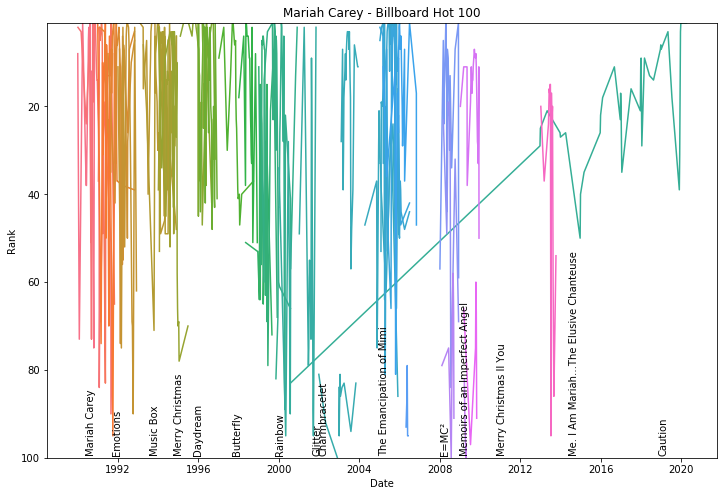

In [46]:
plt.figure(figsize = (12,8))
ax = sns.lineplot(x = 'Date',y = 'Rank', hue = 'Song', 
                  data = mc_song_long.dropna())
ax.set_ylim(100,1)
ax.legend().set_visible(False)

for album in release_dates['Album'].unique():
    rel_dt = release_dates.loc[release_dates['Album'] == album]['Release Date'].iloc[0]
    plt.text(rel_dt,99,album,rotation=90)
    
ax.set_title('Mariah Carey - Billboard Hot 100')
plt.show()

In [47]:
mc_billboard['Track Name'].unique()

array(['Vision Of Love', 'Love Takes Time', 'Someday',
       "I Don't Wanna Cry", 'Emotions', "Can't Let Go", 'Make It Happen',
       "I'll Be There", 'Dreamlover', 'Hero',
       'Without You/Never Forget You', 'Anytime You Need A Friend',
       'Endless Love', 'Fantasy', 'One Sweet Day', 'Always Be My Baby',
       'Honey', 'My All', 'When You Believe', 'I Still Believe',
       'Heartbreaker (feat. Jay-Z)',
       'Thank God I Found You (feat. Joe & 98¡)',
       'All I Want For Christmas Is You', 'Crybaby', 'Loverboy',
       'Never Too Far/Hero Medley', 'Through The Rain',
       'I Know What You Want', 'U Make Me Wanna', "It's Like That",
       'We Belong Together', 'Shake It Off', "Don't Forget About Us",
       "Say Somethin'", 'Touch My Body', 'Bye Bye', 'Migrate',
       "I'll Be Lovin' U Long Time", 'My Love', 'Obsessed',
       'I Want To Know What Love Is', 'Up Out My Face', 'Oh Santa!',
       'All I Want For Christmas Is You (SuperFestive!)', '#Beautiful',
       "Yo

In [48]:
mc_billboard['Track Name'].nunique()

48

Weeks on the billboard hot100

In [49]:
mc_billboard['Date'].nunique()

603

Mariah shares the glory

In [50]:
mc_billboard[mc_billboard['Artist'] !='Mariah Carey']['Track Name'].nunique()

16

Mariah v Mariah

In [51]:
dates = mc_billboard.groupby(['Date'])['Track Name'].nunique().reset_index()
weeks = dates[dates['Track Name'] > 2]['Date']

mc_billboard[mc_billboard['Date'].isin(weeks)]

Date  Rank                    Track Name  \
21501  29/01/1994     2                          Hero   
21536  29/01/1994    37                    Dreamlover   
21552  29/01/1994    53  Without You/Never Forget You   
21601  05/02/1994     2                          Hero   
21634  05/02/1994    35  Without You/Never Forget You   
...           ...   ...                           ...   
85038  21/01/2006    39            We Belong Together   
85046  21/01/2006    47                  Shake It Off   
97104  03/05/2008     5                 Touch My Body   
97122  03/05/2008    23                       Bye Bye   
97191  03/05/2008    92                       Migrate   

                              Artist  
21501                   Mariah Carey  
21536                   Mariah Carey  
21552                   Mariah Carey  
21601                   Mariah Carey  
21634                   Mariah Carey  
...                              ...  
85038                   Mariah Carey  
85046                   Mariah Carey  
97104                   Mariah Carey  
97122                   Mariah Carey  
97191  Mariah Carey Featuring T-Pain  

[63 rows x 4 columns]

How does MC compare to the other top 10 songs when she hit number 1?

In [52]:
no1 = mc_billboard[mc_billboard['Rank'] == 1]['Track Name'].unique()

competition = pd.DataFrame(columns = ['MC Track',
                                     'Start Date',
                                     'End Date'])
lst = []

for song in no1:
    no1_mask = np.logical_and(mc_billboard['Track Name'] == song,
                             mc_billboard['Rank'] == 1)
    dates = pd.to_datetime(mc_billboard[no1_mask]['Date'])
    start_date = min(dates)
    end_date = max(dates)
    competition = competition.append([{'MC Track':song, 
                'Start Date':start_date,
                'End Date': end_date}])
#    competition = competition.append(lst)

In [53]:
import datetime
competition['Before'] = competition['Start Date'] - datetime.timedelta( 6 * 30)
competition['After'] = competition['End Date'] + datetime.timedelta(6 * 30)

In [54]:
import sqlite3

billboard['Date'] = pd.to_datetime(billboard['Date'])
top10 = billboard[billboard['Rank']<= 10]

#Make the db in memory
conn = sqlite3.connect(':memory:')
#write the tables
competition.to_sql('competition', conn, index=False)
top10.to_sql('topten', conn, index=False)

query = '''

select c.*, 'Songs Before' as class, t.[Track Name], t.[Artist]
from competition c 
left join topten t
on t.Date between c.Before and c.[Start Date]

union

select c.*, 'Songs After' as class, t.[Track Name], t.[Artist]
from competition c
left join topten t
on t.Date between c.[End Date] and c.After

'''

competing_songs = pd.read_sql_query(query, conn)

In [55]:
competing_songs['search'] = competing_songs['Track Name'] + " " + competing_songs['Artist']

In [56]:
competing_songs['uri'] = competing_songs['search'].apply(getSpotifyTrack)

In [57]:
remove_features = lambda x: x.split(' Featuring')[0]
competing_songs['Artist to search'] = competing_songs['Artist'].apply(remove_features)

In [58]:
competing_songs['search fallback'] = competing_songs['Track Name']+ " " + competing_songs['Artist to search']

In [59]:
competing_songs['uri fallback'] = competing_songs['search fallback'].apply(getSpotifyTrack)

In [60]:
competing_songs['spotify uri'] =np.where(competing_songs['uri'].isnull(),
                         competing_songs['uri fallback'],
                         competing_songs['uri'])


In [61]:
remove_brackets = lambda x: x.split(' (')[0]
competing_songs['track search'] = competing_songs['Track Name'].apply(remove_brackets)
competing_songs['search fallback 2'] = competing_songs['track search'] + " " + competing_songs['Artist to search']

competing_songs['uri fallback 2'] = competing_songs['search fallback 2'].apply(getSpotifyTrack)

In [62]:
competing_songs['spotify uri'] =np.where(competing_songs['spotify uri'].isnull(),
                         competing_songs['uri fallback 2'],
                         competing_songs['spotify uri'])

In [63]:
remove_slash = lambda x: x.split('/')[0]
competing_songs['track search 2'] = competing_songs['Track Name'].apply(remove_slash)
competing_songs['search fallback 3'] = competing_songs['track search 2'] + " " + competing_songs['Artist to search']

competing_songs['uri fallback 3'] = competing_songs['search fallback 3'].apply(getSpotifyTrack)

In [64]:
competing_songs['spotify uri'] =np.where(competing_songs['spotify uri'].isnull(),
                         competing_songs['uri fallback 3'],
                         competing_songs['spotify uri'])

In [65]:
competing_songs_df = competing_songs[['MC Track',
                                     'Start Date',
                                     'End Date',
                                     'Before',
                                     'After',
                                     'class',
                                     'Track Name',
                                     'Artist',
                                     'spotify uri']].dropna()

In [66]:
competing_audio_features = get_track_details(competing_songs_df['spotify uri'])

In [67]:
merged = competing_songs_df.merge(competing_audio_features,
                      how = 'left',
                      left_on = ['spotify uri'],
                      right_on = ['URI']).drop_duplicates()

merged = merged[['MC Track',
                 'Start Date',
                 'End Date',
                 'Before',
                 'After',
                 'class',
                 'Track Name',
                 'Artist',
                'spotify uri',
                 'Danceability',
                 'Energy',
                 'Key',
                 'Loudness',
                 'Mode',
                 'Speechiness',
                 'Acousticness',
                 'Instrumentalness',
                 'Liveness',
                 'Valence',
                 'Tempo',
                 'Time Signature']]

In [68]:
merged['group'] = np.where(merged['Track Name'].isin(no1),
                           'Mariah Carey #1',
                           merged['class'])

In [69]:
len(competing_songs[competing_songs['Track Name'].isin(no1)]['Track Name'].unique())

19

In [70]:
conn = sqlite3.connect(':memory:')

merged.to_sql('track', conn, index = False)


query = '''
select 
      [MC Track],
        case when Artist like ('%Mariah Carey%')
            then [MC Track]
        else class end as [Track Name],
        avg(Loudness) as Loudness,
        avg(Speechiness) as Speechiness,
        avg(Acousticness) as Acousticness,
        avg(Instrumentalness) as Instrumentalness,
        avg(Liveness) as Liveness,
        avg(Valence) as Valence,
        avg(Danceability) as Danceability,
        avg(Energy) as Energy,
        avg(Tempo) as Temp
from track
where [MC Track]!= 'All I Want For Christmas Is You'
group by [MC Track],
        case when Artist like ('%Mariah Carey%')
            then [MC Track]
        else class end 
'''

result = pd.read_sql_query(query, conn)

In [71]:
def plot_radar_charts_by_song(df):
    columns = ['Track Name',
    'Acousticness',
    'Danceability',
    'Energy',
    'Instrumentalness',
    'Liveness',
    'Speechiness',
    'Valence']
    features = df[columns]
    features = features.melt(id_vars = ['Track Name'])
    px.scatter_polar(features, r = 'value', theta = 'variable', 
                     color = 'Track Name',
                range_r = [0,1],
                 width = 800, height = 400).show()
    return

In [72]:
result

for song in result['MC Track'].unique():
    plot_radar_charts_by_song(result[result['MC Track'] == song])

# Mariah Carey and her collaborators

In [73]:
genius = pd.read_csv('genius.csv', encoding = "ISO-8859-1")

In [74]:
combined_genius = combined.merge(genius, how = 'left',
              left_on = ['Track Name'],
              right_on = ['Amended Name'])


In [75]:
combined_genius = combined_genius[combined_genius['Value']!= 'Mariah Carey']

In [76]:
combined_genius['Release Date'] = pd.to_datetime(combined_genius['Release Date'])
combined_genius['Year'] = combined_genius['Release Date'].dt.year

([<matplotlib.axis.XTick at 0x1a2cca8bd0>,
 <a list of 13 Text xticklabel objects>)

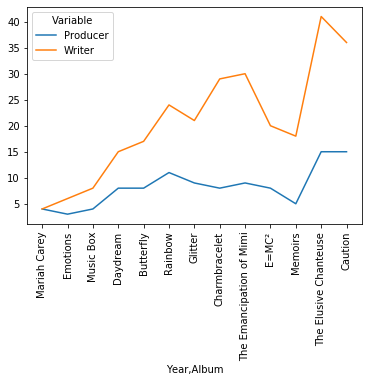

In [77]:
combined_genius.groupby(['Year', 'Album', 'Variable']).Value.nunique().unstack().plot()
x = range(13)
albums = ['Mariah Carey', 'Emotions', 'Music Box', 'Daydream', 'Butterfly',
       'Rainbow', 'Glitter', 'Charmbracelet', 'The Emancipation of Mimi',
       'E=MC²', 'Memoirs',
       'The Elusive Chanteuse', 'Caution']
plt.xticks(x,albums,rotation = 90)



Who has she collaborated with the most?

In [78]:
writers = combined_genius[combined_genius['Variable'] == 'Writer']
producers = combined_genius[combined_genius['Variable'] == 'Producer']


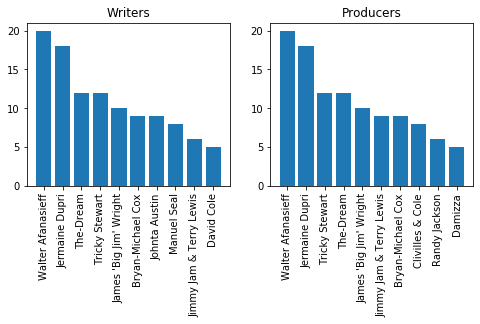

In [79]:
writer_plot = writers.groupby('Value')['Track ID'].count().reset_index().sort_values(by = 'Track ID', ascending = False).head(10)
producer_plot = producers.groupby('Value')['Track ID'].count().reset_index().sort_values(by = 'Track ID', ascending = False).head(10)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
axes[0].bar(writer_plot['Value'],writer_plot['Track ID'])
axes[0].set_title('Writers')

for tick in axes[0].get_xticklabels():
    tick.set_rotation(90)
    
axes[1].bar(producer_plot['Value'],writer_plot['Track ID'])
axes[1].set_title('Producers')

for tick in axes[1].get_xticklabels():
    tick.set_rotation(90)
    

plt.show()

Which songs have had the most writers?

In [80]:
writers.groupby(['Track Name_x'])['Value'].count().reset_index().sort_values(by = 'Value', ascending = False).head(10)



Track Name_x  Value
29                             Dedicated     11
2                                A No No      8
48                                 Honey      8
127                   We Belong Together      8
82                More Than Just Friends      7
60   Irresistible (West Side Connection)      7
42                       Get Your Number      7
72                      Loverboy (Remix)      6
0                             #Beautiful      5
108     Stay Long Love You (feat. Gunna)      5

# Mariah Carey, R&B and Hip Hop

What is Mariah's impact on hip pop?

In [81]:
features = billboard[billboard['Artist'].str.contains('Featuring')]

In [82]:
features['Year'] = features['Date'].dt.year
features = features[['Year','Track Name','Artist']].drop_duplicates()

Text(0.5, 1.0, '# of tracks with a feature')

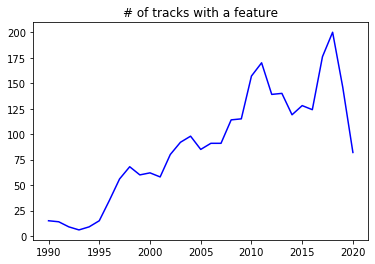

In [83]:
plt.plot(features.groupby('Year')['Track Name'].nunique(), color = 'b')
plt.title('# of tracks with a feature')

# Analysis

## Overview

Based on Spotify's popularity metrics, which are MC's most popular songs?

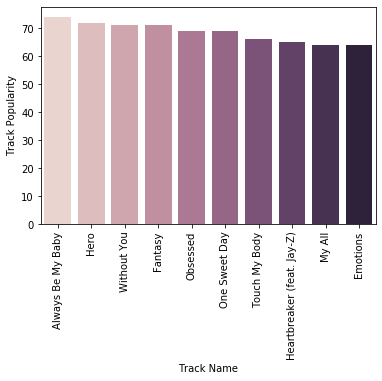

In [84]:
track_popularity = combined.\
                    sort_values(by = 'Track Popularity',
                                    ascending = False)[0:10]

plot_track_popularity(track_popularity)

What do the features of these songs look like?

In [85]:
plot_radar_charts_by_song(track_popularity)

What about the number 1s?

In [86]:
number_1 = combined[combined['#1'] == 1]

In [87]:
number_1

Album           Label Release Date Album Popularity  \
0               Mariah Carey        Columbia   1990-06-12               59   
2               Mariah Carey        Columbia   1990-06-12               59   
3               Mariah Carey        Columbia   1990-06-12               59   
10              Mariah Carey        Columbia   1990-06-12               59   
0                   Emotions        Columbia   1991-09-17               59   
0                  Music Box        Columbia   1993-08-04               70   
1                  Music Box        Columbia   1993-08-04               70   
0                   Daydream        Columbia   1995-09-26               73   
2                   Daydream        Columbia   1995-09-26               73   
4                   Daydream        Columbia   1995-09-26               73   
0                  Butterfly        Columbia   1997-09-03               64   
2                  Butterfly        Columbia   1997-09-03               64   
0                    Rainbow        Columbia   1999-10-29               63   
1   The Emancipation of Mimi  Island Records   2005-01-01               63   
2   The Emancipation of Mimi  Island Records   2005-01-01               63   
14  The Emancipation of Mimi  Island Records   2005-01-01               63   
1                      E=MC²  Island Records   2008-01-01               63   

   Track Number                  Track Name  \
0             1              Vision of Love   
2             3           I Don't Wanna Cry   
3             4                     Someday   
10           11             Love Takes Time   
0             1                    Emotions   
0             1                  Dreamlover   
1             2                        Hero   
0             1                     Fantasy   
2             3               One Sweet Day   
4             5           Always Be My Baby   
0             1                       Honey   
2             3                      My All   
0             1  Heartbreaker (feat. Jay-Z)   
1             2          We Belong Together   
2             3                Shake It Off   
14           15       Don't Forget About Us   
1             2               Touch My Body   

                                Track ID  Track Duration (mins)  \
0   spotify:track:0gLQ6jhJsyYfl7PrD1RZ7X               3.488217   
2   spotify:track:1hFtJ5rV3aAm58ErijHdFO               4.813767   
3   spotify:track:6TSM5vkz0WzyZsNAKKYDcw               4.101767   
10  spotify:track:48l7PNpT2fBoT4cdLW6EzP               3.820433   
0   spotify:track:0cELvuwJW1acISUHYB6suj               4.134883   
0   spotify:track:6HcQZfMrw3KwGyzrKw1Pjy               3.882667   
1   spotify:track:4FCb4CUbFCMNRkI6lYc1zI               4.295550   
0   spotify:track:6xkryXuiZU360Lngd4sx13               4.058217   
2   spotify:track:7ySbfLwdCwl1EM0zNCJZ38               4.684433   
4   spotify:track:2aBxt229cbLDOvtL7Xbb9x               4.302217   
0   spotify:track:5NaOWLOmVjcA3M5spRATN9               4.997100   
2   spotify:track:3RSpK5Y0y5tl25qvssrwJ6               3.848883   
0   spotify:track:0jsANwwkkHyyeNyuTFq2XO               4.761767   
1   spotify:track:2vuGLyblG7494KhyJSeD7E               3.356667   
2   spotify:track:5ROnL6aB4p15CZ2sce0ciQ               3.880667   
14  spotify:track:2hQU8LNZFUcXLUwqeABX3K               3.897767   
1   spotify:track:2H1l4JczUDbiWfQtQElB05               3.412217   

   Track Popularity  Danceability  ...  Loudness Mode  Speechiness  \
0                60         0.256  ...   -10.959    1       0.0382   
2                50         0.641  ...   -12.486    1       0.0310   
3                51         0.685  ...    -8.686    0       0.0405   
10               57         0.602  ...   -12.371    1       0.0293   
0                64         0.741  ...    -7.009    0       0.0359   
0                59         0.701  ...    -6.180    1       0.0357   
1                72         0.501  ...    -9.370    1       0.0290   
0   

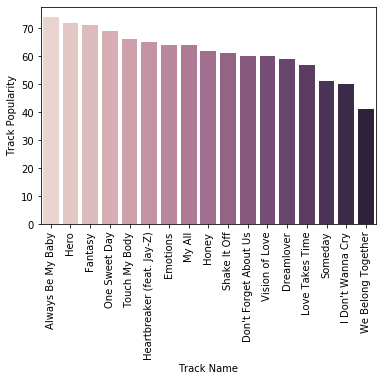

In [88]:
no1_track_popularity = number_1.\
                    sort_values(by = 'Track Popularity',
                                    ascending = False)[0:19]

plot_track_popularity(no1_track_popularity)

In [89]:
plot_radar_charts_by_song(number_1)

## Album analysis

### Mariah Carey (1990)

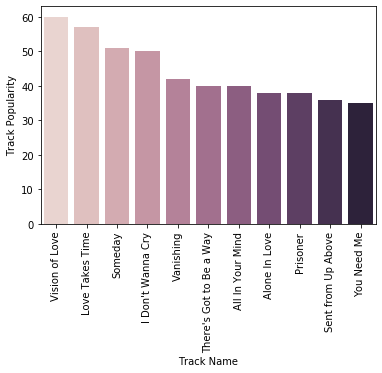

In [90]:
plot_track_popularity(mariah_carey_details)
plot_radar_charts_by_song(mariah_carey_details)

### Emotions (1991)

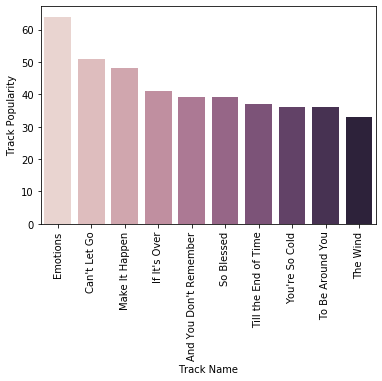

In [91]:
plot_track_popularity(emotions_details)
plot_radar_charts_by_song(emotions_details)

### Music Box (1993)

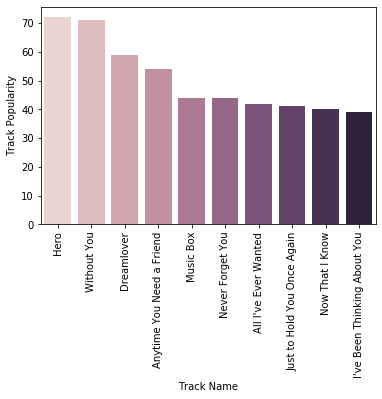

In [92]:
plot_track_popularity(music_box_details)
plot_radar_charts_by_song(music_box_details)

### Daydream (1995)

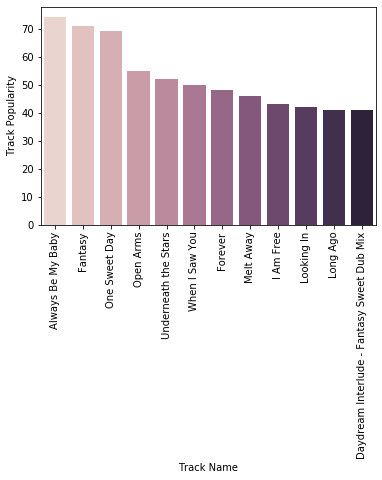

In [93]:
plot_track_popularity(daydream_details)
plot_radar_charts_by_song(daydream_details)

### Butterfly (1997)

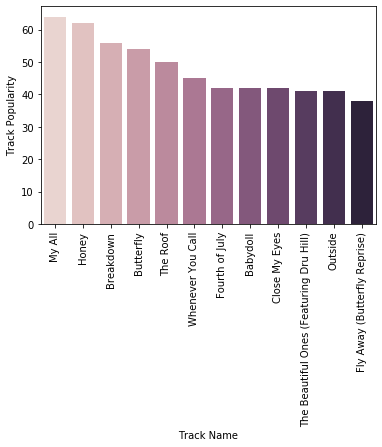

In [94]:
plot_track_popularity(butterfly_details)
plot_radar_charts_by_song(butterfly_details)

### Rainbow (1999)

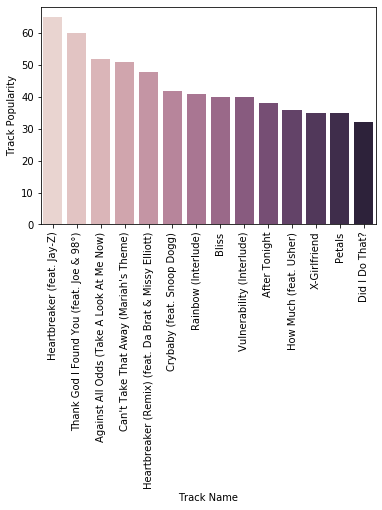

In [95]:
plot_track_popularity(rainbow_details)
plot_radar_charts_by_song(rainbow_details)

### Glitter (2001)

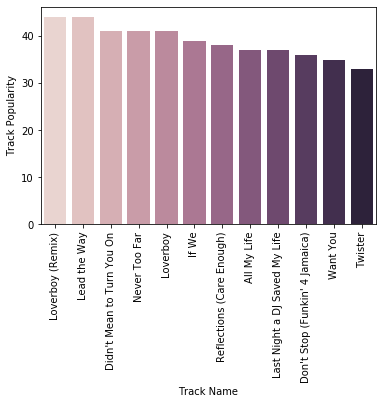

In [96]:
plot_track_popularity(glitter_details)
plot_radar_charts_by_song(glitter_details)

### Charmbracelet (2002)

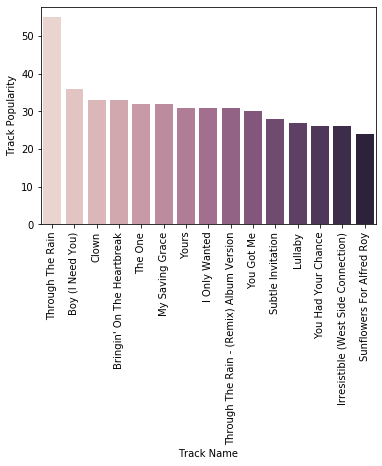

In [97]:
plot_track_popularity(charmbracelet_details)
plot_radar_charts_by_song(charmbracelet_details)

### The Emancipation of Mimi (2005)

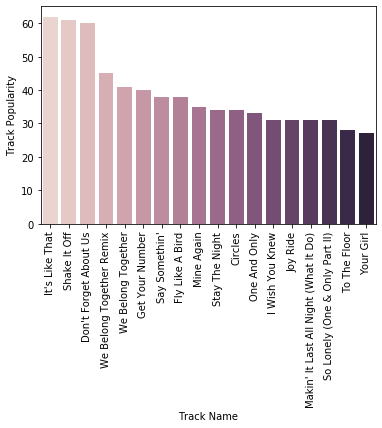

In [98]:
plot_track_popularity(mimi_details)
plot_radar_charts_by_song(mimi_details)

### E=MC² (2008)

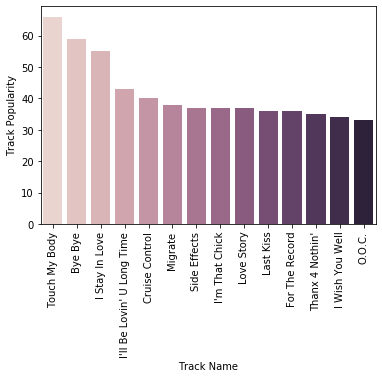

In [99]:
plot_track_popularity(emc2_details)
plot_radar_charts_by_song(emc2_details)

### Memoirs of an Imperfect Angel (2009)

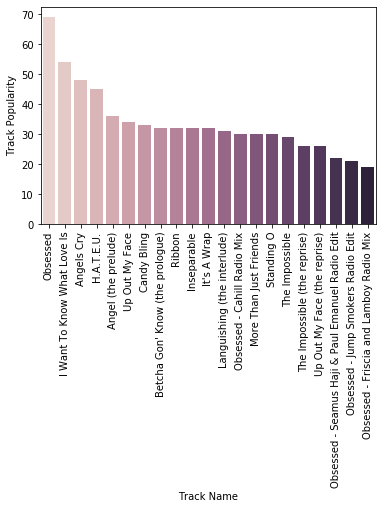

In [100]:
plot_track_popularity(memoirs_details)
plot_radar_charts_by_song(memoirs_details)

### Me. I Am Mariah... The Elusive Chanteuse (2014)

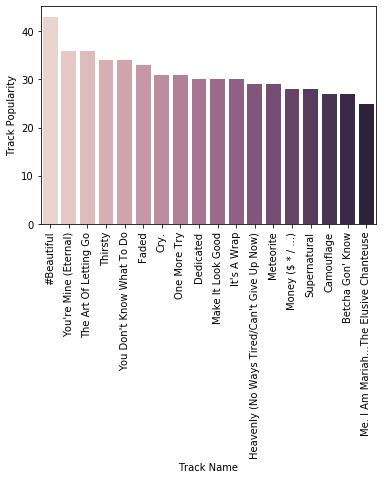

In [101]:
plot_track_popularity(chanteuse_details)
plot_radar_charts_by_song(chanteuse_details)

### Caution (2018)

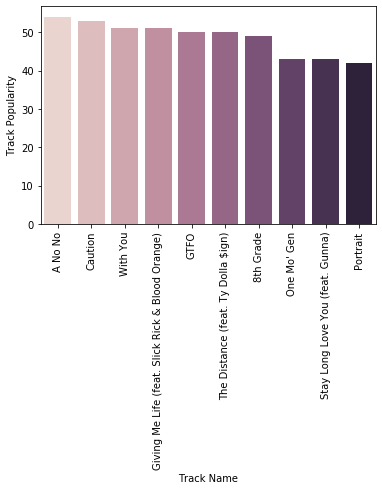

In [102]:
plot_track_popularity(caution_details)
plot_radar_charts_by_song(caution_details)

## Deep dive into MC's catalogue

### Fun facts

Are MC's songs more major or minor?

[Text(0, 0, '1'), Text(0, 0, '0')]

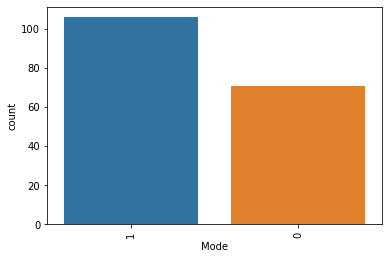

In [103]:
mode_chart = sns.countplot(combined['Mode'],
                         order = combined['Mode'].value_counts().index)
mode_chart.set_xticklabels(labels = mode_chart.get_xticklabels(),rotation = 90)

Is there a favourite key Mariah likes to sing in?

In [104]:
keys = {
    0: "C",
    1: "D♭",
    2: "D",
    3: "E♭",
    4: "E",
    5: "F",
    6: "G♭",
    7: "G",
    8: "A♭",
    9: "A",
    10: "B♭",
    11: "B"}

mode = {
    0: "minor",
    1: "major"
}

relative_keys = {
    "C major": "C major/A minor",
    "D♭ major": "D♭ major/B♭ minor",
    "D major": "D major/B minor",
    "E♭ major": "E♭ major/C minor",
    "E major": "E major/D♭ minor",
    "F major": "F major/D minor",
    "G♭ major": "G♭ major/E♭ minor",
    "G major": "G major/E minor",
    "A♭ major": "A♭ major/F minor",
    "A major": "A major/G♭ minor",
    "B♭ major": "B♭ major/G minor",
    "B major": "B major/A♭ minor",
    "A minor": "C major/A minor",
    "B♭ minor": "D♭ major/B♭ minor",
    "B minor": "D major/B minor",
    "C minor": "E♭ major/C minor",
    "D♭ minor": "E major/D♭ minor",
    "D minor": "F major/D minor",
    "E♭ minor": "G♭ major/E♭ minor",
    "E minor": "G major/E minor",
    "F minor": "A♭ major/F minor",
    "G♭ minor": "A major/G♭ minor",
    "G minor": "B♭ major/G minor",
    "A♭ minor": "B major/A♭ minor",
    
}
combined['Key'] = combined['Key'].map(keys) 
combined['Mode'] =  combined['Mode'].map(mode)
combined['Tonality'] = combined['Key'].str.cat(combined['Mode'],sep=" ")
combined['Key Signature'] = combined['Tonality'].map(relative_keys)

[Text(0, 0, 'D♭ major'),
 Text(0, 0, 'A♭ major'),
 Text(0, 0, 'G major'),
 Text(0, 0, 'F minor'),
 Text(0, 0, 'A major'),
 Text(0, 0, 'C major'),
 Text(0, 0, 'A minor'),
 Text(0, 0, 'G♭ minor'),
 Text(0, 0, 'G minor'),
 Text(0, 0, 'G♭ major'),
 Text(0, 0, 'E♭ major'),
 Text(0, 0, 'D♭ minor'),
 Text(0, 0, 'B♭ major'),
 Text(0, 0, 'E major'),
 Text(0, 0, 'B♭ minor'),
 Text(0, 0, 'D major'),
 Text(0, 0, 'B minor'),
 Text(0, 0, 'F major'),
 Text(0, 0, 'D minor'),
 Text(0, 0, 'E minor'),
 Text(0, 0, 'C minor'),
 Text(0, 0, 'B major'),
 Text(0, 0, 'A♭ minor'),
 Text(0, 0, 'E♭ minor')]

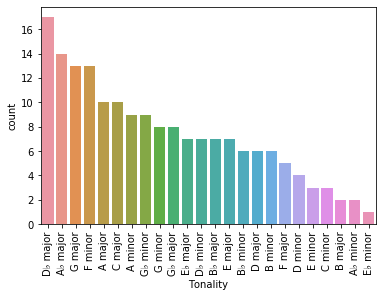

In [105]:
key_chart = sns.countplot(combined['Tonality'],
                         order = combined['Tonality'].value_counts().index)
key_chart.set_xticklabels(labels = key_chart.get_xticklabels(),rotation = 90)

[Text(0, 0, 'A♭ major/F minor'),
 Text(0, 0, 'D♭ major/B♭ minor'),
 Text(0, 0, 'A major/G♭ minor'),
 Text(0, 0, 'C major/A minor'),
 Text(0, 0, 'G major/E minor'),
 Text(0, 0, 'B♭ major/G minor'),
 Text(0, 0, 'E major/D♭ minor'),
 Text(0, 0, 'D major/B minor'),
 Text(0, 0, 'E♭ major/C minor'),
 Text(0, 0, 'G♭ major/E♭ minor'),
 Text(0, 0, 'F major/D minor'),
 Text(0, 0, 'B major/A♭ minor')]

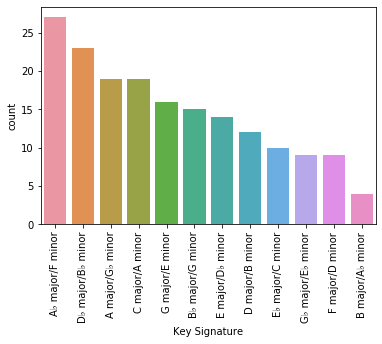

In [106]:
key_sig_chart = sns.countplot(combined['Key Signature'],
                         order = combined['Key Signature'].value_counts().index)
key_sig_chart.set_xticklabels(labels = key_sig_chart.get_xticklabels(),rotation = 90)

What songs are they?

In [107]:
combined[combined['Key Signature'] == 'A♭ major/F minor']['Track Name']

9                                              Prisoner
4                                       Now That I Know
8                          I've Been Thinking About You
3                                             Open Arms
9                                               Forever
10              The Beautiful Ones (Featuring Dru Hill)
6     Heartbreaker (Remix) (feat. Da Brat & Missy El...
1                                          Lead the Way
2                                                 If We
4                        Don't Stop (Funkin' 4 Jamaica)
0                                      Through The Rain
5                                         I Only Wanted
9                                               Lullaby
10                  Irresistible (West Side Connection)
0                                               Migrate
6                                            Love Story
5                                           Inseparable
11                                       The Imp

In [108]:
number_1 = combined[combined['#1'] == 1]

What about the number 1s?

[Text(0, 0, 'D♭ major/B♭ minor'),
 Text(0, 0, 'G major/E minor'),
 Text(0, 0, 'E major/D♭ minor'),
 Text(0, 0, 'C major/A minor'),
 Text(0, 0, 'F major/D minor'),
 Text(0, 0, 'D major/B minor'),
 Text(0, 0, 'B♭ major/G minor'),
 Text(0, 0, 'B major/A♭ minor')]

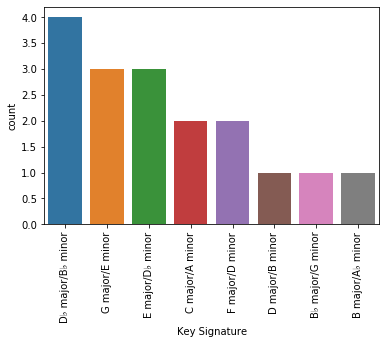

In [109]:
no1_key_sig_chart = sns.countplot(number_1['Key Signature'],
                         order = number_1['Key Signature'].value_counts().index)
no1_key_sig_chart.set_xticklabels(labels = no1_key_sig_chart.get_xticklabels(),rotation = 90)

What are her longest songs?

In [110]:
combined.sort_values('Track Duration (mins)',
                    ascending = False)['Track Name'][0:10]

10             The Beautiful Ones (Featuring Dru Hill)
7                        Last Night a DJ Saved My Life
12                                        One More Try
5     Giving Me Life (feat. Slick Rick & Blood Orange)
2                                                Bliss
13          Heavenly (No Ways Tired/Can't Give Up Now)
8                                 Till the End of Time
9                           Crybaby (feat. Snoop Dogg)
1                                     Boy (I Need You)
3                                             The Roof
Name: Track Name, dtype: object

What is her most danceable song?

In [111]:
combined.sort_values('Danceability',
                    ascending = False)['Track Name'][0:10]

6     Heartbreaker (Remix) (feat. Da Brat & Missy El...
5                                        I'm That Chick
15                Makin' It Last All Night (What It Do)
11                                         To The Floor
1                                    We Belong Together
7                         Last Night a DJ Saved My Life
4                        Don't Stop (Funkin' 4 Jamaica)
8                                        Up Out My Face
4                                         Say Somethin'
2                                        Cruise Control
Name: Track Name, dtype: object

Which song has the highest energy?

In [112]:
combined.sort_values('Energy',
                    ascending = False)['Track Name'][0:10]

8                                             Want You
5                                          All My Life
3                           Didn't Mean to Turn You On
17                         Obsessed - Cahill Radio Mix
18    Obsessed - Seamus Haji & Paul Emanuel Radio Edit
0                                     Loverboy (Remix)
4                                      Now That I Know
9                         Up Out My Face (the reprise)
8                         I've Been Thinking About You
20             Obsessed - Friscia and Lamboy Radio Mix
Name: Track Name, dtype: object

### Exploring relationships between the features

In [113]:
combined = combined.fillna(0)

In [114]:
num_features = ['Track Popularity', 'Danceability','Energy',
           'Key', 'Loudness', 'Speechiness', 'Acousticness',
           'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 
                '#1']

num_features_df = combined[num_features]

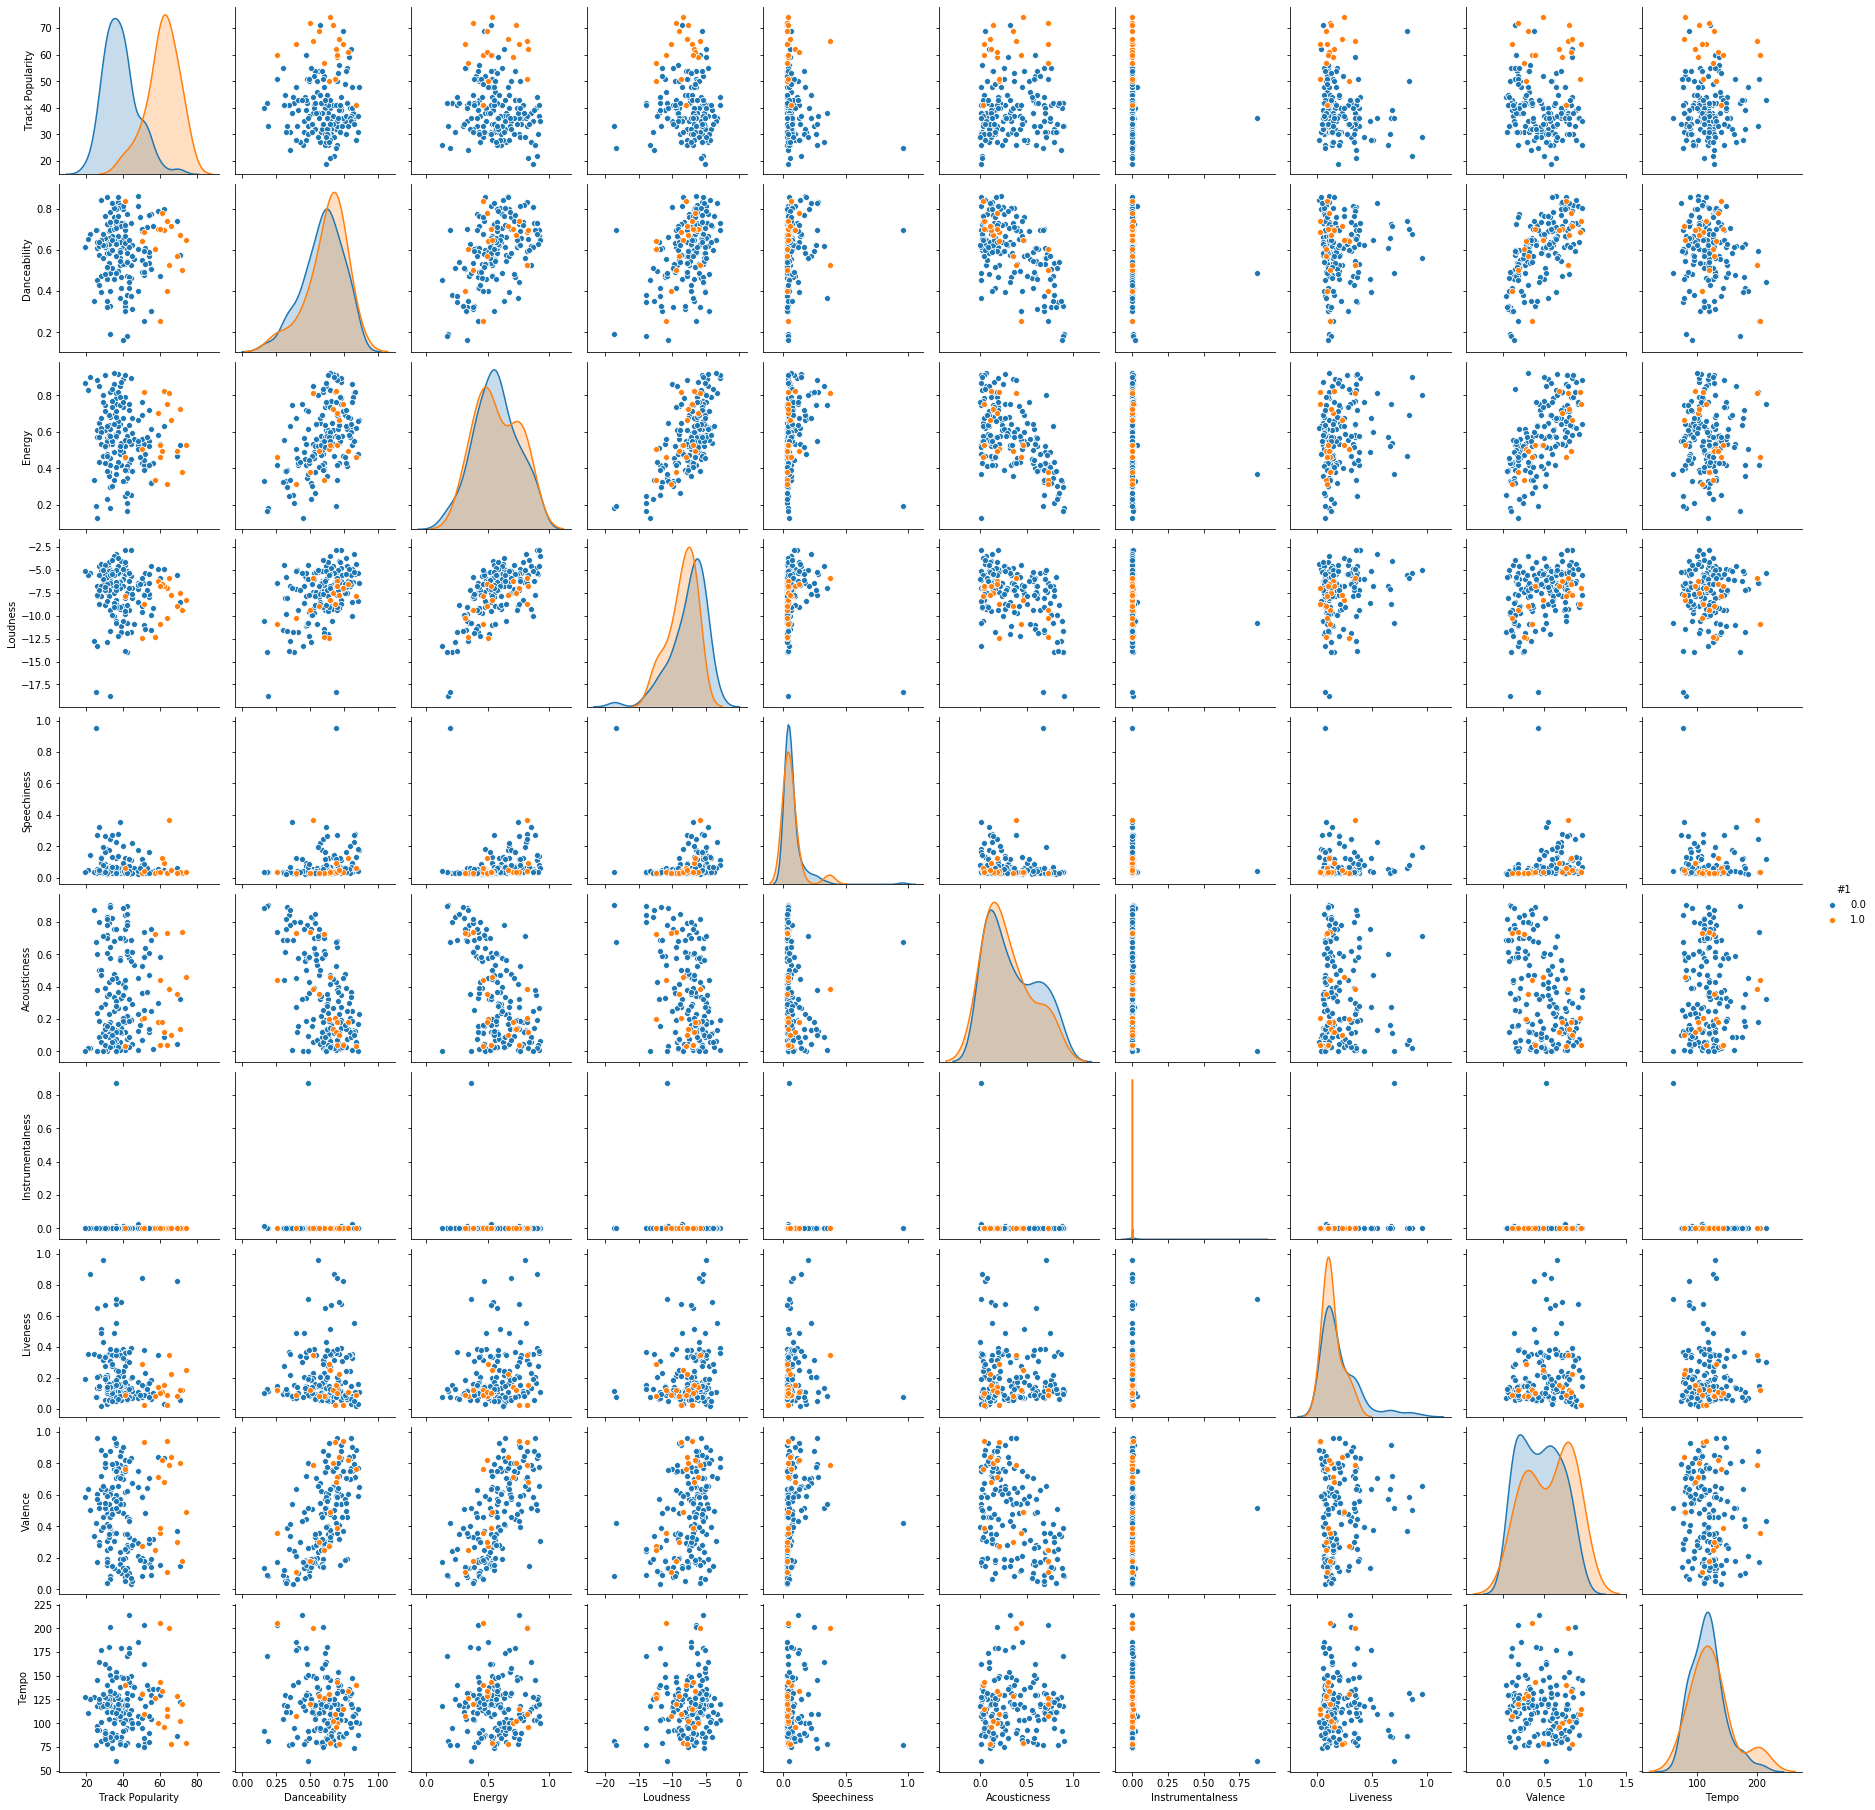

In [115]:
sns.pairplot(num_features_df, hue = '#1')

Looks like Mariah's hits are those that have higher valence, energy and danceability

### Wordclouds by album

In [116]:
def get_album_lyrics(album_lyrics_dict):
    lyrics = []
    for song in album_lyrics_dict.keys():
        lyrics = lyrics + album_lyrics_dict[song]
    
    return lyrics

def plot_wordcloud(album_lyrics, image, album):
    from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
    from PIL import Image
    stopwords = set(STOPWORDS)
    mask = np.array(Image.open(image).convert('RGB'))
    wc = WordCloud(stopwords = stopwords,
                            width = 800,
                            height = 800,
                            mask = mask,
                            min_font_size = 5
                            ,background_color = "white").generate(' '.join(album_lyrics))
    plt.figure(figsize = (4, 4), facecolor = None) 
    image_colors = ImageColorGenerator(mask)
    plt.imshow(wc.recolor(color_func=image_colors), 
               interpolation="bilinear")
    plt.axis("off") 
    plt.title(album)
    plt.tight_layout(pad = 0) 
    return

In [117]:
mc_lyrics_album = get_album_lyrics(mc_lyrics)
emotions_lyrics_album = get_album_lyrics(emotions_lyrics)
musicbox_lyrics_album = get_album_lyrics(musicbox_lyrics)
daydream_lyrics_album = get_album_lyrics(daydream_lyrics)
butterfly_lyrics_album = get_album_lyrics(butterfly_lyrics)
rainbow_lyrics_album = get_album_lyrics(rainbow_lyrics)
glitter_lyrics_album = get_album_lyrics(glitter_lyrics)
charmbracelet_lyrics_album = get_album_lyrics(charmbracelet_lyrics)
mimi_lyrics_album = get_album_lyrics(mimi_lyrics)
emc2_lyrics_album = get_album_lyrics(emc2_lyrics)
memoirs_lyrics_album = get_album_lyrics(memoirs_lyrics)
chanteuse_lyrics_album = get_album_lyrics(chanteuse_lyrics)
caution_lyrics_album = get_album_lyrics(caution_lyrics)


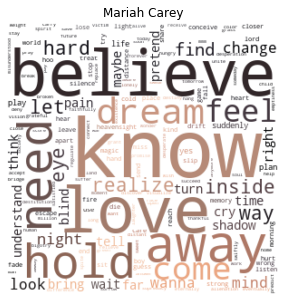

In [118]:
plot_wordcloud(mc_lyrics_album, 'img/Mariah_Carey.png', 'Mariah Carey')

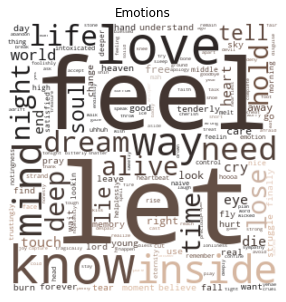

In [119]:
plot_wordcloud(emotions_lyrics_album, 'img/emotions.png', 'Emotions')

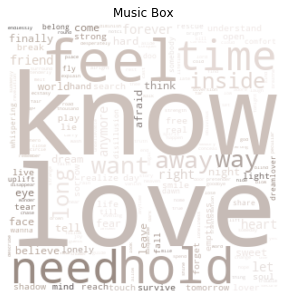

In [120]:
plot_wordcloud(musicbox_lyrics_album, 'img/music_box.png', 'Music Box')

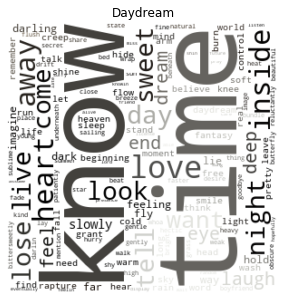

In [121]:
plot_wordcloud(daydream_lyrics_album, 'img/daydream.png', 'Daydream')

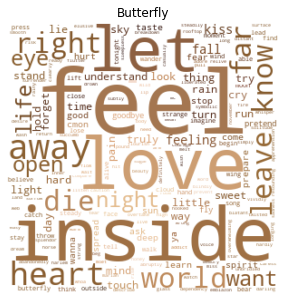

In [122]:
plot_wordcloud(butterfly_lyrics_album, 'img/butterfly.png', 'Butterfly')

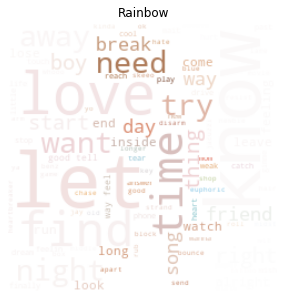

In [123]:
plot_wordcloud(rainbow_lyrics_album, 'img/rainbow.png', 'Rainbow')

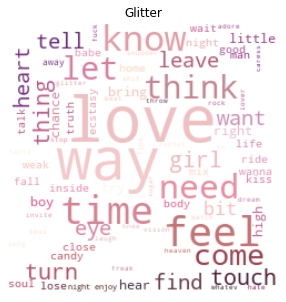

In [124]:
plot_wordcloud(glitter_lyrics_album, 'img/glitter.png', 'Glitter')

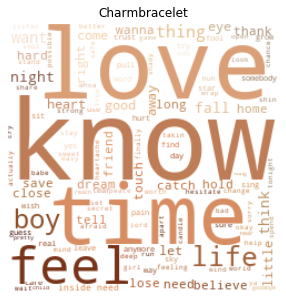

In [125]:
plot_wordcloud(charmbracelet_lyrics_album, 'img/charmbracelet.png','Charmbracelet')

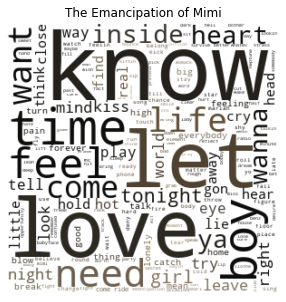

In [126]:
plot_wordcloud(mimi_lyrics_album, 'img/mimi.png', 'The Emancipation of Mimi')

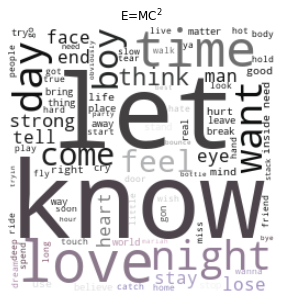

In [127]:
plot_wordcloud(emc2_lyrics_album, 'img/emc2.png', 'E=MC$^2$')

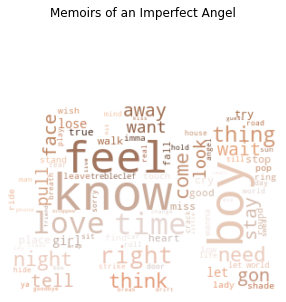

In [128]:
plot_wordcloud(memoirs_lyrics_album, 'img/memoirs.png', 'Memoirs of an Imperfect Angel')

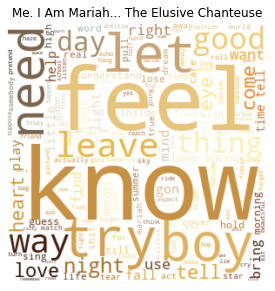

In [129]:
plot_wordcloud(chanteuse_lyrics_album, 'img/chanteuse.png', 'Me. I Am Mariah... The Elusive Chanteuse')

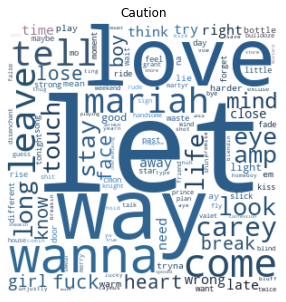

In [130]:
plot_wordcloud(caution_lyrics_album, 'img/caution.png', 'Caution')

### Sentiment analysis

In [131]:
## Try the VADER model
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [132]:
lyrics_full['pct_negative'] = np.NaN
lyrics_full['pct_positive'] = np.NaN
lyrics_full['pct_neutral'] = np.NaN

for song in range(0,len(lyrics_full['Lyrics'])):
    num_positive = 0
    num_neutral = 0
    num_negative = 0

    for line in range(0,len(lyrics_full['Lyrics'][song])):
        score = sid.polarity_scores(lyrics_full['Lyrics'][song][line])
        comp = score['compound']
        if comp >= 0.5:
            num_positive += 1
        elif comp > -0.5 and comp < 0.5:
            num_neutral += 1
        else:
            num_negative += 1
        num_total = num_negative + num_neutral + num_positive
        percent_negative = (num_negative/float(num_total))
        percent_neutral = (num_neutral/float(num_total))
        percent_positive = (num_positive/float(num_total))
    lyrics_full['pct_negative'][song] = percent_negative
    lyrics_full['pct_neutral'][song] = percent_neutral
    lyrics_full['pct_positive'][song] = percent_positive

In [133]:
lyrics_full['positive'] = np.where(lyrics_full['pct_positive']>
                                   lyrics_full['pct_negative'], 1, 0)
lyrics_full['negative'] = np.where(lyrics_full['pct_positive']<
                                   lyrics_full['pct_negative'], 1, 0)
lyrics_full['neutral'] = np.where(np.logical_and(lyrics_full['positive'] ==0,
                                                lyrics_full['negative'] == 0),
                                  1,0)
lyrics_full.groupby('Album').sum()

pct_negative  \
Album                                                              
Butterfly                                               0.289323   
Caution                                                 0.840883   
Charmbracelet                                           0.780191   
Daydream                                                0.229306   
E=MC²                                                   0.508466   
Emotions                                                0.339726   
Glitter                                                 0.333575   
Mariah Carey                                            0.324588   
Me. I Am Mariah…The Elusive Chanteuse (Deluxe)          0.684092   
Memoirs of an imperfect Angel (International Ve...      0.413444   
Music Box                                               0.433733   
Rainbow                                                 0.343682   
The Emancipation of Mimi                                0.730890   

                                                    pct_positive  pct_neutral  \
Album                                                                           
Butterfly                                               0.803269    10.907408   
Caution                                                 0.787095     8.372022   
Charmbracelet                                           1.598484    11.621326   
Daydream                                                1.966590     9.804104   
E=MC²                                                   1.475905    12.015629   
Emotions                                                0.873035     8.787239   
Glitter                                                 1.403421    10.263004   
Mariah Carey                                            1.054852     9.620560   
Me. I Am Mariah…The Elusive Chanteuse (Deluxe)          1.859598    15.456310   
Memoirs of an imperfect Angel (International Ve...      1.956825    14.629731   
Music Box                                               1.221936     8.344331   
Rainbow                                                 1.715884    11.940433   
The Emancipation of Mimi                                1.535443    15.733666   

                                                    positive  negative  \
Album                                                                    
Butterfly                                                  6         4   
Caution                                                    5         4   
Charmbracelet                                             11         3   
Daydream                                                   8         1   
E=MC²                                                     10         3   
Emotions                                                   7         3   
Glitter                                                   10         2   
Mariah Carey                                               6         3   
Me. I Am Mariah…The Elusive Chanteuse (Deluxe)            12         4   
Memoirs of an imperfect Angel (International Ve...        11         2   
Music Box                                                  7         2   
Rainbow                                                    9         3   
The Emancipation of Mimi                                  12         4   

                                                    neutral  
Album                                                        
Butterfly                                                 2  
Caution                                                   1  
Charmbracelet                                             0  
Daydream                                                  3  
E=MC²                                                     1  
Emotions                                                  0  
Glitter                                                   0  
Mariah Carey                                              2  
Me. I Am Mariah…The Elusive Chanteuse (Deluxe)            2  
Memoirs of an imperfec

In [134]:
## Try textblob
from textblob import TextBlob

lyrics_full['pct_positive_tb'] = np.NaN
lyrics_full['pct_negative_tb'] = np.NaN
lyrics_full['pct_neutral_tb'] = np.NaN

for song in range(0,len(lyrics_full['Lyrics'])):
    num_positive = 0
    num_neutral = 0
    num_negative = 0

    for line in range(0,len(lyrics_full['Lyrics'][song])):
        score = TextBlob(lyrics_full['Lyrics'][song][line]).sentiment.polarity
        if score > 0:
            num_positive += 1
        elif score < 0:
            num_negative += 1
        else:
            num_neutral += 1
        num_total = num_negative + num_neutral + num_positive
        percent_negative = (num_negative/float(num_total))
        percent_neutral = (num_neutral/float(num_total))
        percent_positive = (num_positive/float(num_total))
    lyrics_full['pct_negative_tb'][song] = percent_negative
    lyrics_full['pct_neutral_tb'][song] = percent_neutral
    lyrics_full['pct_positive_tb'][song] = percent_positive

In [135]:
lyrics_full['positive_tb'] = np.where(lyrics_full['pct_positive_tb']>
                                   lyrics_full['pct_negative_tb'], 1, 0)
lyrics_full['negative_tb'] = np.where(lyrics_full['pct_positive_tb']<
                                   lyrics_full['pct_negative_tb'], 1, 0)
lyrics_full['neutral_tb'] = np.where(np.logical_and(lyrics_full['positive_tb'] ==0,
                                                lyrics_full['negative_tb'] == 0),
                                  1,0)

### Topic modelling

In [136]:
lyrics_list = lyrics_full.Lyrics.apply(lambda x: ' '.join([str(i) for i in x]))

In [137]:
## Document term matrix
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
add_stop_words =['ah','aww','ay','ae','bab','baba','bbj', 'bl',
              'like','know','need', 'let', 'feel',  'yo']

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
cv = CountVectorizer(stop_words = stop_words)
data = cv.fit_transform(lyrics_df['Lyrics'])
data_dtm = pd.DataFrame(data.toarray(),
                        columns = cv.get_feature_names())
data_dtm.index = lyrics_df['Track Name']
data_dtm

abandon  abandonedly  \
Track Name                                                               
Vision of Love                                          0            0   
There's Got to Be a Way                                 0            0   
I Don't Wanna Cry                                       0            0   
Someday                                                 0            0   
Vanishing                                               0            0   
...                                                   ...          ...   
Giving Me Life (feat. Slick Rick & Blood Orange)        0            0   
One Mo' Gen                                             0            0   
8th Grade                                               0            0   
Stay Long Love You (feat. Gunna)                        0            0   
Portrait                                                0            0   

                                                  abandonment  able  abruptly  \
Track Name                                                                      
Vision of Love                                              0     0         0   
There's Got to Be a Way                                     0     0         0   
I Don't Wanna Cry                                           0     0         0   
Someday                                                     0     0         0   
Vanishing                                                   0     0         0   
...                                                       ...   ...       ...   
Giving Me Life (feat. Slick Rick & Blood Orange)            0     0         0   
One Mo' Gen                                                 0     0         0   
8th Grade                                                   0     0         0   
Stay Long Love You (feat. Gunna)                            0     0         0   
Portrait                                                    0     0         0   

                                                  abundant  accentuate  \
Track Name                                                               
Vision of Love                                           0           0   
There's Got to Be a Way                                  0           0   
I Don't Wanna Cry                                        0           0   
Someday                                                  0           0   
Vanishing                                                0           0   
...                                                    ...         ...   
Giving Me Life (feat. Slick Rick & Blood Orange)         0           0   
One Mo' Gen                                              0           0   
8th Grade                                                0           0   
Stay Long Love You (feat. Gunna)                         0           0   
Portrait                                                 0           0   

                                                  accept  access  accountable  \
Track Name                                                                      
Vision of Love                                         0       0            0   
There's Got to Be a Way                                1       0            0   
I Don't Wanna Cry                                      0       0            0   
Someday                                                0       0            0   
Vanishing                                              0       0            0   
...                                                  ...     ...          ...   
Giving Me Life (feat. Slick Rick & Blood Orange)       0       0            0   
One Mo' Gen                                            0       0            0   
8th Grade                                              0       0            0   
Stay Long Love You (feat. Gunna)                       0       0            0   
Portrait                                               0       0            0   

                

In [138]:
from gensim import matutils, models
import scipy.sparse
tdm = data_dtm.transpose()
tdm.head()

Track Name   Vision of Love  There's Got to Be a Way  I Don't Wanna Cry  \
abandon                   0                        0                  0   
abandonedly               0                        0                  0   
abandonment               0                        0                  0   
able                      0                        0                  0   
abruptly                  0                        0                  0   

Track Name   Someday  Vanishing  All In Your Mind  Alone In Love  You Need Me  \
abandon            0          0                 0              0            0   
abandonedly        0          0                 0              0            0   
abandonment        0          0                 0              0            0   
able               0          0                 0              0            0   
abruptly           0          0                 0              0            0   

Track Name   Sent from Up Above  Prisoner  ...  GTFO  With You  Caution  \
abandon                       0         0  ...     0         0        0   
abandonedly                   0         0  ...     0         0        0   
abandonment                   0         0  ...     0         0        0   
able                          0         0  ...     0         0        0   
abruptly                      0         0  ...     0         0        0   

Track Name   A No No  The Distance (feat. Ty Dolla $ign)  \
abandon            0                                   0   
abandonedly        0                                   0   
abandonment        0                                   0   
able               0                                   0   
abruptly           0                                   0   

Track Name   Giving Me Life (feat. Slick Rick & Blood Orange)  One Mo' Gen  \
abandon                                                     0            0   
abandonedly                                                 0            0   
abandonment                                                 0            0   
able                                                        0            0   
abruptly                                                    0            0   

Track Name   8th Grade  Stay Long Love You (feat. Gunna)  Portrait  
abandon              0                                 0         0  
abandonedly          0                                 0         0  
abandonment          0                                 0         0  
able                 0                                 0         0  
abruptly             0                                 0         0  

[5 rows x 171 columns]

In [139]:
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [140]:
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [141]:
lda = models.LdaModel(corpus = corpus,
                     id2word = id2word,
                     num_topics = 3,
                     passes = 10)

lda.print_topics()

[(0,
  '0.011*"love" + 0.009*"time" + 0.008*"want" + 0.007*"wanna" + 0.007*"tell" + 0.007*"try" + 0.006*"boy" + 0.006*"come" + 0.006*"way" + 0.006*"thing"'),
 (1,
  '0.011*"love" + 0.008*"way" + 0.008*"away" + 0.007*"inside" + 0.007*"life" + 0.007*"night" + 0.006*"time" + 0.006*"eye" + 0.005*"heart" + 0.005*"dream"'),
 (2,
  '0.010*"love" + 0.009*"time" + 0.007*"heart" + 0.007*"come" + 0.006*"night" + 0.006*"tell" + 0.006*"right" + 0.006*"boy" + 0.005*"eye" + 0.005*"mind"')]

#### Nouns only LDA

In [142]:
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [143]:
from sklearn.feature_extraction.text import CountVectorizer

cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(lyrics_df['Lyrics'].apply(nouns))
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = lyrics_df['Track Name']
data_dtmn

abandon  accentuate  accept  \
Track Name                                                                      
Vision of Love                                          0           0       0   
There's Got to Be a Way                                 0           0       1   
I Don't Wanna Cry                                       0           0       0   
Someday                                                 0           0       0   
Vanishing                                               0           0       0   
...                                                   ...         ...     ...   
Giving Me Life (feat. Slick Rick & Blood Orange)        0           0       0   
One Mo' Gen                                             0           0       0   
8th Grade                                               0           0       0   
Stay Long Love You (feat. Gunna)                        0           0       0   
Portrait                                                0           0       0   

                                                  access  accusation  \
Track Name                                                             
Vision of Love                                         0           0   
There's Got to Be a Way                                0           0   
I Don't Wanna Cry                                      0           0   
Someday                                                0           0   
Vanishing                                              0           0   
...                                                  ...         ...   
Giving Me Life (feat. Slick Rick & Blood Orange)       0           0   
One Mo' Gen                                            0           0   
8th Grade                                              0           0   
Stay Long Love You (feat. Gunna)                       0           0   
Portrait                                               0           0   

                                                  acquiescent  act  actin  \
Track Name                                                                  
Vision of Love                                              0    0      0   
There's Got to Be a Way                                     0    0      0   
I Don't Wanna Cry                                           0    0      0   
Someday                                                     0    0      0   
Vanishing                                                   0    0      0   
...                                                       ...  ...    ...   
Giving Me Life (feat. Slick Rick & Blood Orange)            0    0      0   
One Mo' Gen                                                 0    0      0   
8th Grade                                                   0    0      0   
Stay Long Love You (feat. Gunna)                            0    0      0   
Portrait                                                    0    0      0   

                                                  action  admire  ...  yall  \
Track Name                                                        ...         
Vision of Love                                         0       0  ...     0   
There's Got to Be a Way                                0       0  ...     0   
I Don't Wanna Cry                                      0       0  ...     0   
Someday                                                0       0  ...     0   
Vanishing                                              0       0  ...     0   
...                                                  ...     ...  ...   ...   
Giving Me Life (feat. Slick Rick & Blood Orange)       0       0  ...     0   
One Mo' Gen                                            0       0  ...     0   
8th Grade                                              0       0  ...     0   
Stay Long Love You (feat. Gunna)                       0       0  ...     0   
Portrait                                               0       0  ...     0   

                             

In [144]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [145]:
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.016*"time" + 0.013*"night" + 0.012*"life" + 0.010*"thing" + 0.010*"way" + 0.010*"mind" + 0.009*"dream" + 0.009*"boy" + 0.008*"eye" + 0.008*"heart"'),
 (1,
  '0.014*"time" + 0.012*"heart" + 0.011*"way" + 0.009*"life" + 0.009*"world" + 0.008*"night" + 0.007*"fall" + 0.007*"thing" + 0.006*"love" + 0.006*"eye"'),
 (2,
  '0.013*"way" + 0.012*"time" + 0.011*"eye" + 0.010*"night" + 0.010*"heart" + 0.008*"day" + 0.007*"life" + 0.006*"thing" + 0.006*"world" + 0.006*"try"')]

#### Nouns and adjectives only LDA

In [146]:
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [147]:
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(lyrics_df['Lyrics'].apply(nouns_adj))
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = lyrics_df['Track Name']
data_dtmna

abandon  abandonment  able  \
Track Name                                                                     
Vision of Love                                          0            0     0   
There's Got to Be a Way                                 0            0     0   
I Don't Wanna Cry                                       0            0     0   
Someday                                                 0            0     0   
Vanishing                                               0            0     0   
...                                                   ...          ...   ...   
Giving Me Life (feat. Slick Rick & Blood Orange)        0            0     0   
One Mo' Gen                                             0            0     0   
8th Grade                                               0            0     0   
Stay Long Love You (feat. Gunna)                        0            0     0   
Portrait                                                0            0     0   

                                                  abundant  accentuate  \
Track Name                                                               
Vision of Love                                           0           0   
There's Got to Be a Way                                  0           0   
I Don't Wanna Cry                                        0           0   
Someday                                                  0           0   
Vanishing                                                0           0   
...                                                    ...         ...   
Giving Me Life (feat. Slick Rick & Blood Orange)         0           0   
One Mo' Gen                                              0           0   
8th Grade                                                0           0   
Stay Long Love You (feat. Gunna)                         0           0   
Portrait                                                 0           0   

                                                  accept  access  accountable  \
Track Name                                                                      
Vision of Love                                         0       0            0   
There's Got to Be a Way                                1       0            0   
I Don't Wanna Cry                                      0       0            0   
Someday                                                0       0            0   
Vanishing                                              0       0            0   
...                                                  ...     ...          ...   
Giving Me Life (feat. Slick Rick & Blood Orange)       0       0            0   
One Mo' Gen                                            0       0            0   
8th Grade                                              0       0            0   
Stay Long Love You (feat. Gunna)                       0       0            0   
Portrait                                               0       0            0   

                                                  accusation  acquiescent  \
Track Name                                                                  
Vision of Love                                             0            0   
There's Got to Be a Way                                    0            0   
I Don't Wanna Cry                                          0            0   
Someday                                                    0            0   
Vanishing                                                  0            0   
...                                                      ...          ...   
Giving Me Life (feat. Slick Rick & Blood Orange)           0            0   
One Mo' Gen                                                0            0   
8th Grade                                                  0            0   
Stay Long Love You (feat. Gunna)                           0            0   
Portrait                                                   0        

In [148]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [149]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.010*"way" + 0.010*"time" + 0.009*"life" + 0.008*"eye" + 0.007*"heart" + 0.007*"night" + 0.007*"dream" + 0.006*"thing" + 0.006*"world" + 0.006*"look"'),
 (1,
  '0.010*"time" + 0.009*"way" + 0.008*"night" + 0.008*"heart" + 0.007*"right" + 0.007*"life" + 0.006*"mind" + 0.006*"eye" + 0.005*"try" + 0.005*"thing"'),
 (2,
  '0.010*"time" + 0.007*"night" + 0.005*"good" + 0.005*"thing" + 0.005*"boy" + 0.005*"man" + 0.004*"real" + 0.004*"little" + 0.004*"high" + 0.004*"day"')]

#### NMF

In [357]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

stop_words.extend(['like', 'let', 'look','thing', 
                   'feel', 'eye','come', 'moment','song',
                  'hear', 'past'])
#                  'need', 'want', 'look', 'night', 'tonight', 
#                   'away', 'hold', 'guess'])
vectorizer = TfidfVectorizer(stop_words = stop_words
                             ,min_df = 0.05)

#min df tells us that a word should
#appear in 10% of songs to be considered

In [358]:
tfidf = vectorizer.fit_transform(lyrics_df['Lyrics'])

In [359]:
from sklearn.decomposition import NMF

nmf = NMF(n_components = 4)
topic_values = nmf.fit_transform(tfidf)

In [360]:
for topic_num, topic in enumerate(nmf.components_):
    message = "Topic #{}: ".format(topic_num + 1)
    message += " ".join([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-11 :-1]])
    print(message)

Topic #1: believe find inside end need know heart love understand time
Topic #2: boy play girl good wanna leave ya tell mariah mean
Topic #3: touch heaven dream need feeling want love long wait tonight
Topic #4: away light open far walk fade run night rain shine


In [475]:
topic_labels = ['Power Ballads',
               'R&B/Hip-hop aficionado',
               'Love and Limerance',
               'Introspective Escapism']

In [477]:
df_topics = pd.DataFrame(topic_values, columns = topic_labels)

In [478]:
topic_lyrics = lyrics_df.join(df_topics)

In [479]:
topic1 = topic_lyrics.sort_values(by = ['Power Ballads'], 
                        ascending = False).head(5)[['Track Name',
                                                    'Power Ballads']]

topic1 = topic1.reset_index().drop(columns = ['index'])
topic1 = topic1[['Track Name']]
topic1 = topic1.rename(columns = {'Track Name' : 
                        'Power Ballads'})

topic2 = topic_lyrics.sort_values(by = ['R&B/Hip-hop aficionado'], 
                        ascending = False).head(6)[['Track Name',
                                                    'R&B/Hip-hop aficionado']]

topic3 = topic_lyrics.sort_values(by = ['Love and Limerance'], 
                        ascending = False).head(5)[['Track Name',
                                                    'Love and Limerance']]

topic3 = topic3.reset_index().drop(columns = ['index'])

topic3 = topic3[['Track Name']]
topic3 = topic3.rename(columns = {'Track Name' : 
                        'Love and Limerance'})

topic4 = topic_lyrics.sort_values(by = ['Introspective Escapism'], 
                        ascending = False).head(8)[['Track Name',
                                                    'Introspective Escapism']]

In [480]:
#Take out remixes from topic 2

topic2 = topic2[~topic2['Track Name'].isin(["Heartbreaker (Remix) (feat. Da Brat & Missy Elliott)"])]
topic2 = topic2.reset_index()[['Track Name']]
topic2 = topic2.rename(columns = {'Track Name' : 
                        'R&B/Hip-hop aficionado'})


In [481]:
#Take out prologues/reprises/preludes from topic 4
topic4 = topic4[~topic4['Track Name'].isin(["Angel (the prelude)",
                           "Betcha Gon' Know (the prologue)",
                          "Fly Away (Butterfly Reprise)"])]
topic4 = topic4.reset_index()[['Track Name']]
topic4 = topic4.rename(columns = {'Track Name' : 
                        'Introspective Escapism'})

In [482]:
pd.concat([topic1, 
           topic2,
          topic3,
          topic4],axis =1)

Power Ballads          R&B/Hip-hop aficionado  \
0  And You Don't Remember      Heartbreaker (feat. Jay-Z)   
1                 Someday                    Shake It Off   
2            Lead the Way                    One And Only   
3       I Don't Wanna Cry               Make It Look Good   
4                    Hero  Don't Stop (Funkin' 4 Jamaica)   

     Love and Limerance Introspective Escapism  
0                 Bliss             Angels Cry  
1      To Be Around You              Vanishing  
2         After Tonight         Fourth of July  
3  All I've Ever Wanted       Betcha Gon' Know  
4              Loverboy          Alone In Love

In [483]:
combined_topic = combined.merge(topic_lyrics,
              how = 'left',
              left_on = ['Track Name'],
              right_on = ['Track Name'])

In [484]:
combined_topic[combined_topic.isnull().any(axis = 1)]

Album               Label  \
95                                       Charmbracelet  Def Jam Recordings   
145  Memoirs of an imperfect Angel (International V...  Def Jam Recordings   
146  Memoirs of an imperfect Angel (International V...  Def Jam Recordings   
147  Memoirs of an imperfect Angel (International V...  Def Jam Recordings   
148  Memoirs of an imperfect Angel (International V...  Def Jam Recordings   

    Release Date Album Popularity Track Number  \
95    2002-01-01               51           15   
145   2009-01-01               64           18   
146   2009-01-01               64           19   
147   2009-01-01               64           20   
148   2009-01-01               64           21   

                                           Track Name  \
95           Through The Rain - (Remix) Album Version   
145                       Obsessed - Cahill Radio Mix   
146  Obsessed - Seamus Haji & Paul Emanuel Radio Edit   
147                Obsessed - Jump Smokers Radio Edit   
148           Obsessed - Friscia and Lamboy Radio Mix   

                                 Track ID  Track Duration (mins)  \
95   spotify:track:1WTCapPxFQbgXTkI9Q74C9               3.537333   
145  spotify:track:1ykA1AlbDZ39G0KKNuwpxj               3.344667   
146  spotify:track:4Ugsucas2tL6I08Lb5Z6Yx               3.205767   
147  spotify:track:1RbW1dL2TiKuvXKA2P4m6i               3.328667   
148  spotify:track:0IzPgfXjI7fH1VwMxKy1d9               4.192217   

    Track Popularity  Danceability  ...  Instrumentalness Liveness  Valence  \
95                31         0.354  ...                 0    0.219    0.412   
145               30         0.630  ...           0.00384    0.276    0.849   
146               22         0.675  ...          0.000192    0.868    0.501   
147               21         0.651  ...                 0    0.351    0.637   
148               19         0.616  ...          7.97e-05    0.194    0.585   

       Tempo  Time Signature  Lyrics Power Ballads  R&B/Hip-hop aficionado  \
95   111.787               4     NaN           NaN                     NaN   
145  127.974               4     NaN           NaN                     NaN   
146  125.988               4     NaN           NaN                     NaN   
147  110.673               4     NaN           NaN                     NaN   
148  127.950               4     NaN           NaN                     NaN   

     Love and Limerance  Introspective Escapism  
95                  NaN                     NaN  
145                 NaN                     NaN  
146                 NaN                     NaN  
147                 NaN                     NaN  
148                 NaN                     NaN  

[5 rows x 26 columns]

In [485]:
## OK to drop the remixes 

combined_topic = combined_topic.dropna()

In [487]:
combined_topic['Release Date'] =pd.to_datetime(combined_topic['Release Date'])
combined_topic['Year']= combined_topic['Release Date'].dt.year
album_avg = combined_topic.groupby('Year').mean()[['Power Ballads',
                                      'R&B/Hip-hop aficionado',
                                      'Love and Limerance',
                                      'Introspective Escapism']]

In [488]:
album_avg

Power Ballads  R&B/Hip-hop aficionado  Love and Limerance  \
Year                                                              
1990       0.145915                0.042615            0.066928   
1991       0.153136                0.013237            0.138225   
1993       0.121994                0.025362            0.109829   
1995       0.073814                0.014942            0.105740   
1997       0.066485                0.043345            0.066931   
1999       0.087892                0.126993            0.071188   
2001       0.097695                0.123931            0.104452   
2002       0.087513                0.094353            0.105631   
2005       0.060957                0.170111            0.077670   
2008       0.088216                0.143325            0.083316   
2009       0.037957                0.139259            0.053434   
2014       0.072724                0.137880            0.054115   
2018       0.019851                0.166801            0.110696   

      Introspective Escapism  
Year                          
1990                0.082724  
1991                0.036273  
1993                0.078828  
1995                0.110941  
1997                0.159463  
1999                0.053596  
2001                0.042314  
2002                0.067420  
2005                0.057462  
2008                0.057477  
2009                0.110342  
2014                0.068884  
2018                0.044559

([<matplotlib.axis.XTick at 0x1a3c231ed0>,
 <a list of 13 Text xticklabel objects>)

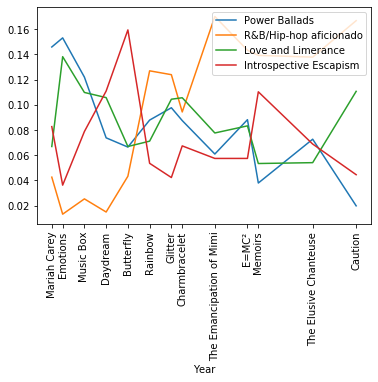

In [489]:
album_avg.plot()
plt.xticks(album_avg.index,
           albums,
           rotation = 90)

### Readability metrics

Using the textstat package for Python, we calculated a number of aggregate readability metrics associated with each song's lyrics:

"num_words": [int],             # Number of words in lyrics.
"num_lines": [int],             # Number of lines in lyrics.
"num_syllables": [int],         # Number of syllables in lyrics.
"difficult_words": [int],       # Number of words not on the Dale–Chall "easy" word list.
"fog_index": [float],           # Gunning-Fog readability index.
"flesch_index": [float],        # Flesch reading ease score.
"f_k_grade": [float],           # Flesch–Kincaid grade level of lyrics.

Sentiment analysis
https://kevinschaich.io/billboard/


Using the Natural Language Toolkit (NLTK) for Python, we used the VADER model for parsimonious rule-based sentiment analysis of each song's lyrics. Each song was run through a sentiment analyzer and output an object with data about its sentiment:

## Putting it all together

In [490]:
combined_topic.columns

Index(['Album', 'Label', 'Release Date', 'Album Popularity', 'Track Number',
       'Track Name', 'Track ID', 'Track Duration (mins)', 'Track Popularity',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Time Signature', 'Lyrics', 'Power Ballads', 'R&B/Hip-hop aficionado',
       'Love and Limerance', 'Introspective Escapism', 'Year'],
      dtype='object')

In [727]:
combined_topic.groupby('Mode')['Valence'].mean()

Mode
0    0.541041
1    0.409055
Name: Valence, dtype: float64

In [736]:
col_to_keep = ['Album', 'Track Name'
               ,'Danceability','Energy',
              #'Loudness',
               'Speechiness','Acousticness',
              #'Instrumentalness',#'Liveness',
               'Valence',
              'Tempo', #'Mode',
               'Power Ballads',
              'R&B/Hip-hop aficionado',
              'Love and Limerance',
              'Introspective Escapism']

In [737]:
df_cluster = combined_topic[col_to_keep]

In [738]:
from sklearn.preprocessing import MinMaxScaler

In [739]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_cluster.drop(columns = ['Album',
                                                              'Track Name']))

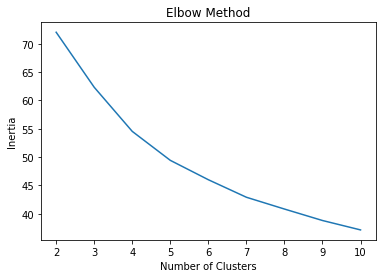

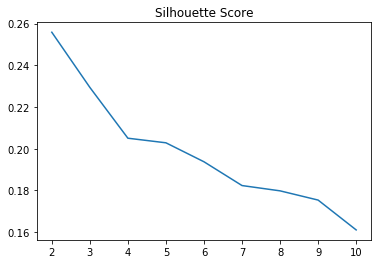

In [740]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

elbow = []
sil =[]

X = scaled_data
for i in range(2,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  elbow.append(kmeans.inertia_)
  cluster_assignment = kmeans.predict(X)
  sil_score = silhouette_score(X, cluster_assignment)
  sil.append(sil_score)
plt.plot(range(2,11), elbow)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

plt.plot(range(2,11),sil)
plt.title('Silhouette Score')
plt.show()


In [741]:
no_clusters = 4
kmodel = KMeans(n_clusters=no_clusters, 
                max_iter=10000,
                init='k-means++',
                random_state=123).fit(X)

In [742]:
df_cluster['label'] = kmodel.labels_

In [793]:
cluster_avg = df_cluster.groupby('label').mean()

In [794]:
cluster_avg = cluster_avg.drop(columns = ['Tempo'])

In [795]:
cluster_avg.reset_index()

label  Danceability    Energy  Speechiness  Acousticness   Valence  \
0      0      0.439477  0.403977     0.035002      0.637955  0.204805   
1      1      0.686811  0.663283     0.116666      0.176390  0.610415   
2      2      0.564032  0.473258     0.043319      0.387742  0.303290   
3      3      0.681535  0.667163     0.062767      0.230149  0.657907   

   Power Ballads  R&B/Hip-hop aficionado  Love and Limerance  \
0       0.155480                0.027195            0.080655   
1       0.036245                0.229710            0.046396   
2       0.027387                0.049812            0.073444   
3       0.103935                0.062158            0.144950   

   Introspective Escapism  
0                0.040406  
1                0.052140  
2                0.225761  
3                0.030219

In [796]:
cluster = pd.DataFrame(cluster_avg.reset_index())

In [797]:
cluster = cluster.replace({'label': {0: 'Power Ballads',
                          1: 'R&B/Hip-hop aficionado',
                          2: 'Introspective Escapism',
                          3: 'Love and Limerance'}})

In [800]:
cluster

label  Danceability    Energy  Speechiness  Acousticness  \
0           Power Ballads      0.439477  0.403977     0.035002      0.637955   
1  R&B/Hip-hop aficionado      0.686811  0.663283     0.116666      0.176390   
2  Introspective Escapism      0.564032  0.473258     0.043319      0.387742   
3      Love and Limerance      0.681535  0.667163     0.062767      0.230149   

    Valence  Power Ballads  R&B/Hip-hop aficionado  Love and Limerance  \
0  0.204805       0.155480                0.027195            0.080655   
1  0.610415       0.036245                0.229710            0.046396   
2  0.303290       0.027387                0.049812            0.073444   
3  0.657907       0.103935                0.062158            0.144950   

   Introspective Escapism  
0                0.040406  
1                0.052140  
2                0.225761  
3                0.030219

In [798]:
cluster_avg = cluster.melt(id_vars = 'label')

In [799]:
px.scatter_polar(cluster_avg, r = 'value',theta = 'variable',
                range_r = [0,1], color = 'label',
                width = 800, height = 400).show()

In [823]:
df_cluster[df_cluster['Track Name'].isin(no1)].groupby('label').count()

Album  Track Name  Danceability  Energy  Speechiness  Acousticness  \
label                                                                       
0          6           6             6       6            6             6   
1          4           4             4       4            4             4   
2          1           1             1       1            1             1   
3          6           6             6       6            6             6   

       Valence  Tempo  Power Ballads  R&B/Hip-hop aficionado  \
label                                                          
0            6      6              6                       6   
1            4      4              4                       4   
2            1      1              1                       1   
3            6      6              6                       6   

       Love and Limerance  Introspective Escapism  
label                                              
0                       6                       6  
1                       4                       4  
2                       1                       1  
3                       6                       6

In [817]:
no1 =np.append(no1,['Vision of Love',
               'Thank God I Found You (feat. Joe & 98°)'])

In [834]:
clust0 = df_cluster[np.logical_and(df_cluster['Track Name'].isin(no1),
                          df_cluster['label'] == 0)][['Track Name']].reset_index()
clust1 = df_cluster[np.logical_and(df_cluster['Track Name'].isin(no1),
                          df_cluster['label'] == 1)][['Track Name']].reset_index()
clust2 = df_cluster[np.logical_and(df_cluster['Track Name'].isin(no1),
                          df_cluster['label'] == 2)][['Track Name']] .reset_index()
clust3 = df_cluster[np.logical_and(df_cluster['Track Name'].isin(no1),
                          df_cluster['label'] == 3)][['Track Name']].reset_index()

In [837]:
pd.concat([clust0.drop(columns = 'index').rename(columns = {'Track Name' :'Power Ballads'}) , 
           clust1.drop(columns = 'index').rename(columns = {'Track Name' :'R&B/Hip-hop aficionado'}),
          clust2.drop(columns = 'index').rename(columns = {'Track Name' :'Introspective Escapism'}),
          clust3.drop(columns = 'index').rename(columns = {'Track Name' :'Love and Limerance'})],axis =1)

Power Ballads      R&B/Hip-hop aficionado  \
0                           Vision of Love                       Honey   
1                        I Don't Wanna Cry  Heartbreaker (feat. Jay-Z)   
2                          Love Takes Time       Don't Forget About Us   
3                                     Hero               Touch My Body   
4                                   My All                         NaN   
5  Thank God I Found You (feat. Joe & 98°)                         NaN   

  Introspective Escapism  Love and Limerance  
0          One Sweet Day             Someday  
1                    NaN            Emotions  
2                    NaN          Dreamlover  
3                    NaN             Fantasy  
4                    NaN   Always Be My Baby  
5                    NaN  We Belong Together

In [841]:
df_cluster[df_cluster['label'] == 2]

Album  \
4                                         Mariah Carey   
6                                         Mariah Carey   
24                                           Music Box   
26                                           Music Box   
32                                            Daydream   
33                                            Daydream   
36                                            Daydream   
39                                            Daydream   
44                                           Butterfly   
46                                           Butterfly   
47                                           Butterfly   
48                                           Butterfly   
50                                           Butterfly   
52                                           Butterfly   
59                                             Rainbow   
63                                             Rainbow   
81                                       Charmbracelet   
86                                       Charmbracelet   
90                                       Charmbracelet   
93                                       Charmbracelet   
104                           The Emancipation of Mimi   
128  Memoirs of an imperfect Angel (International V...   
131  Memoirs of an imperfect Angel (International V...   
135  Memoirs of an imperfect Angel (International V...   
140  Memoirs of an imperfect Angel (International V...   
141  Memoirs of an imperfect Angel (International V...   
142  Memoirs of an imperfect Angel (International V...   
157     Me. I Am Mariah…The Elusive Chanteuse (Deluxe)   
158     Me. I Am Mariah…The Elusive Chanteuse (Deluxe)   
163     Me. I Am Mariah…The Elusive Chanteuse (Deluxe)   
164     Me. I Am Mariah…The Elusive Chanteuse (Deluxe)   

                                   Track Name  Danceability  Energy  \
4                                   Vanishing         0.383   0.208   
6                               Alone In Love         0.637   0.511   
24                                  Music Box         0.375   0.255   
26                           Never Forget You         0.525   0.533   
32                       Underneath the Stars         0.607   0.403   
33                              One Sweet Day         0.569   0.495   
36                                  I Am Free         0.415   0.430   
39                                  Melt Away         0.554   0.560   
44                                  Butterfly         0.534   0.524   
46                                   The Roof         0.551   0.563   
47                             Fourth of July         0.547   0.562   
48                                  Breakdown         0.717   0.432   
50                              Close My Eyes         0.604   0.393   
52               Fly Away (Butterfly Reprise)         0.597   0.479   
59                              After Tonight         0.590   0.501   
63   Against All Odds (Take A Look At Me Now)         0.529   0.477   
81                           Through The Rain         0.509   0.318   
86                              I Only Wanted         0.607   0.432   
90                                    Lullaby         0.577   0.649   
93                 Bringin' On The Heartbreak         0.488   0.616   
104                                   Circles         0.669   0.534   
128           Betcha Gon' Know (the prologue)         0.656   0.570   
131                               Candy Bling         0.401   0.460   
135                               It's A Wrap         0.626   0.357   
140              The Impossible (the reprise)         0.452   0.128   
141                       Angel (the prelude)         0.487   0.368   
142                                Angels Cry         0.605   0.549   
157                              Supernatural         0.647   0.599   
158                                 Meteorite         0.622   0.765   
163                               It's A Wrap         0.765   